# Comp3115 Group J Sorce Code

In [ ]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import requests
from tqdm import tqdm # for making progress bar
from time import gmtime, strftime, time
import urllib.parse
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

## Task 1
19222947 Lam Shiu Ching

In [ ]:
!pip install requests pandas numpy seaborn tqdm

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import folium as fol
import webbrowser

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 23

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
from time import gmtime, strftime, time
import urllib.parse

def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

In [ ]:
# acquire data through gov data API
building_list_home_confinees_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/building_list_home_confinees_eng.csv')
building_list_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/building_list_eng.csv')
home_confinees_tier2_building_list_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/home_confinees_tier2_building_list.csv')
pd.read_csv(home_confinees_tier2_building_list_urls[1]).head(20)
# pd.read_csv(building_list_urls[0])

編號 No.             區 District  \
0        1  中西區 Central & Western   
1        2  中西區 Central & Western   
2        3  中西區 Central & Western   
3        4  中西區 Central & Western   
4        5  中西區 Central & Western   
5        6  中西區 Central & Western   
6        7  中西區 Central & Western   
7        8  中西區 Central & Western   
8        9  中西區 Central & Western   
9       10  中西區 Central & Western   
10      11  中西區 Central & Western   
11      12  中西區 Central & Western   
12      13  中西區 Central & Western   
13      14  中西區 Central & Western   
14      15  中西區 Central & Western   
15      16  中西區 Central & Western   
16      17  中西區 Central & Western   
17      18  中西區 Central & Western   
18      19  中西區 Central & Western   
19      20  中西區 Central & Western   

                                           地址 Address  \
0                                       加多近山\nCADOGAN   
1   西摩道11號福澤花園A座\nBLOCK A, THE FORTUNE GARDENS, NO...   
2   花園道55號愛都大廈3座\nBLOCK 3, ESTORIL COURT, NO.55 GA...   
3         皇后大道西355-359號\nNO.355-359 QUEEN'S ROAD WEST   
4                            泰成大廈\nTAI SHING BUILDING   
5                                高雲臺\nGOLDWIN HEIGHTS   
6                              啟豐大廈\nKAI FUNG MANSION   
7                           堅城中心\nKENNEDY TOWN CENTRE   
8   第三街208號毓明閣1座\nBLOCK 1, YUK MING TOWERS, NO.208...   
9                德輔道西333號\nNO.333 DES VOEUX ROAD WEST   
10             德輔道西408A號\nNO.408A DES VOEUX ROAD WEST   
11                                          蔚然\nAZURA   
12            羅便臣道74號1座\nBLOCK 1, NO.74 ROBINSON ROAD   
13                                 BRANKSOME GRANDE\n   
14                                       CONDUIT 18\n   
15  加惠民道29號加惠臺1座\nBLOCK 1, CAYMAN RISE, NO.29 KA W...   
16                           永成樓\nWING SHING BUILDING   
17                    永樂街105號\nNO.105 WING LOK STREET   
18                        先施西環大廈\nSINCERE WESTERN HSE   
19                    卑路乍街48號\nNO.48 BELCHER'S STREET   

   家居檢疫最後日期 End Date of Home Quarantine Order  
0                                  27/02/2020  
1                                  27/02/2020  
2                                  27/02/2020  
3                                  27/02/2020  
4                                  27/02/2020  
5                                  27/02/2020  
6                                  27/02/2020  
7                                  27/02/2020  
8                                  27/02/2020  
9                                  27/02/2020  
10                                 27/02/2020  
11                                 27/02/2020  
12                                 27/02/2020  
13                                 28/02/2020  
14                                 28/02/2020  
15                                 28/02/2020  
16                                 28/02/2020  
17                                 28/02/2020  
18                                 28/02/2020  
19                                 28/02/2020

In [ ]:
building_list_home_confinees_urls
building_list_urls
# clean bugged data , [6]
del home_confinees_tier2_building_list_urls[6] 

In [ ]:
# set dataframe
building_list_home_confinees_df = pd.DataFrame()
building_list_df = pd.DataFrame()
home_confinees_tier2_building_df = pd.DataFrame()

# fetch
for u in tqdm(home_confinees_tier2_building_list_urls):
    home_confinees_tier2_building_df = pd.concat([home_confinees_tier2_building_df, pd.read_csv(u,index_col=False)])

100%|██████████| 8/8 [00:23<00:00,  2.92s/it]


In [ ]:
# home_confinees_tier2_building
home_confinees_tier2_building_df.describe()

編號 No.
count  78790.000000
mean    5312.736502
std     3431.842914
min        1.000000
25%     2463.000000
50%     4925.000000
75%     7738.000000
max    13649.000000

In [ ]:
home_confinees_tier2_building_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78790 entries, 0 to 13648
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   編號 No.                                      78790 non-null  int64 
 1   區 District                                  78790 non-null  object
 2   地址 Address                                  78790 non-null  object
 3   家居檢疫最後日期 End Date of Home Quarantine Order  78790 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
# this dataset is the period of 27/02/2020 to 26/03/2020
home_confinees_tier2_building_df

編號 No.             區 District  \
0           1  中西區 Central & Western   
1           2  中西區 Central & Western   
2           3  中西區 Central & Western   
3           4  中西區 Central & Western   
4           5  中西區 Central & Western   
...       ...                    ...   
13644   13645             離島 Islands   
13645   13646             離島 Islands   
13646   13647             離島 Islands   
13647   13648             離島 Islands   
13648   13649             離島 Islands   

                                              地址 Address  \
0                                          加多近山\nCADOGAN   
1      西摩道11號福澤花園A座\nBLOCK A, THE FORTUNE GARDENS, NO...   
2      花園道55號愛都大廈3座\nBLOCK 3, ESTORIL COURT, NO.55 GA...   
3            皇后大道西355-359號\nNO.355-359 QUEEN'S ROAD WEST   
4                               泰成大廈\nTAI SHING BUILDING   
...                                                  ...   
13644              滿東邨滿和樓\nMUN WO HOUSE, MUN TUNG ESTATE   
13645            滿東邨滿康樓\nMUN HONG HOUSE, MUN TUNG ESTATE   
13646            滿東邨滿順樓\nMUN SHUN HOUSE, MUN TUNG ESTATE   
13647  藍天海岸水藍‧天岸3座\nBLOCK 3, LE BLEU DEUX, COASTAL SK...   
13648            藍天海岸影岸‧紅B座\nLA ROSSA B, COASTAL SKYLINE   

      家居檢疫最後日期 End Date of Home Quarantine Order  
0                                     27/02/2020  
1                                     27/02/2020  
2                                     27/02/2020  
3                                     27/02/2020  
4                                     27/02/2020  
...                                          ...  
13644                                 26/03/2020  
13645                                 26/03/2020  
13646                                 26/03/2020  
13647                                 26/03/2020  
13648                                 26/03/2020  

[78790 rows x 4 columns]

In [ ]:
home_confinees_tier2_building_df.drop(columns=['編號 No.'],inplace=True)
home_confinees_tier2_building_df.rename(columns={"區 District": "District", "地址 Address": "Address","家居檢疫最後日期 End Date of Home Quarantine Order":"End Date of Home Quarantine Order"},inplace=True)

In [ ]:
# remove Chinese 
home_confinees_tier2_building_df['District'] = home_confinees_tier2_building_df['District'].str.replace(r'[^\x00-\x7F]+', '')
# home_confinees_tier2_building_df['Address'] = home_confinees_tier2_building_df['Address'].str.replace(r'[^\x00-\x7F]+', '')

# print(home_confinees_tier2_building_df['Address'].str.partition('\n')[2]);

# clean address string
home_confinees_tier2_building_df['Address'] = home_confinees_tier2_building_df['Address'].str.partition('\n')[2]
home_confinees_tier2_building_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


District                                           Address  \
0       Central & Western                                           CADOGAN   
1       Central & Western  BLOCK A, THE FORTUNE GARDENS, NO.11 SEYMOUR ROAD   
2       Central & Western         BLOCK 3, ESTORIL COURT, NO.55 GARDEN ROAD   
3       Central & Western                      NO.355-359 QUEEN'S ROAD WEST   
4       Central & Western                                TAI SHING BUILDING   
...                   ...                                               ...   
13644             Islands                     MUN WO HOUSE, MUN TUNG ESTATE   
13645             Islands                   MUN HONG HOUSE, MUN TUNG ESTATE   
13646             Islands                   MUN SHUN HOUSE, MUN TUNG ESTATE   
13647             Islands            BLOCK 3, LE BLEU DEUX, COASTAL SKYLINE   
13648             Islands                       LA ROSSA B, COASTAL SKYLINE   

      End Date of Home Quarantine Order  
0                            27/02/2020  
1                            27/02/2020  
2                            27/02/2020  
3                            27/02/2020  
4                            27/02/2020  
...                                 ...  
13644                        26/03/2020  
13645                        26/03/2020  
13646                        26/03/2020  
13647                        26/03/2020  
13648                        26/03/2020  

[78790 rows x 3 columns]

In [ ]:
# total count of covid case
home_confinees_tier2_building_df['District'].count()

78790

In [ ]:
sns.set(rc={'figure.figsize':(30,20)})

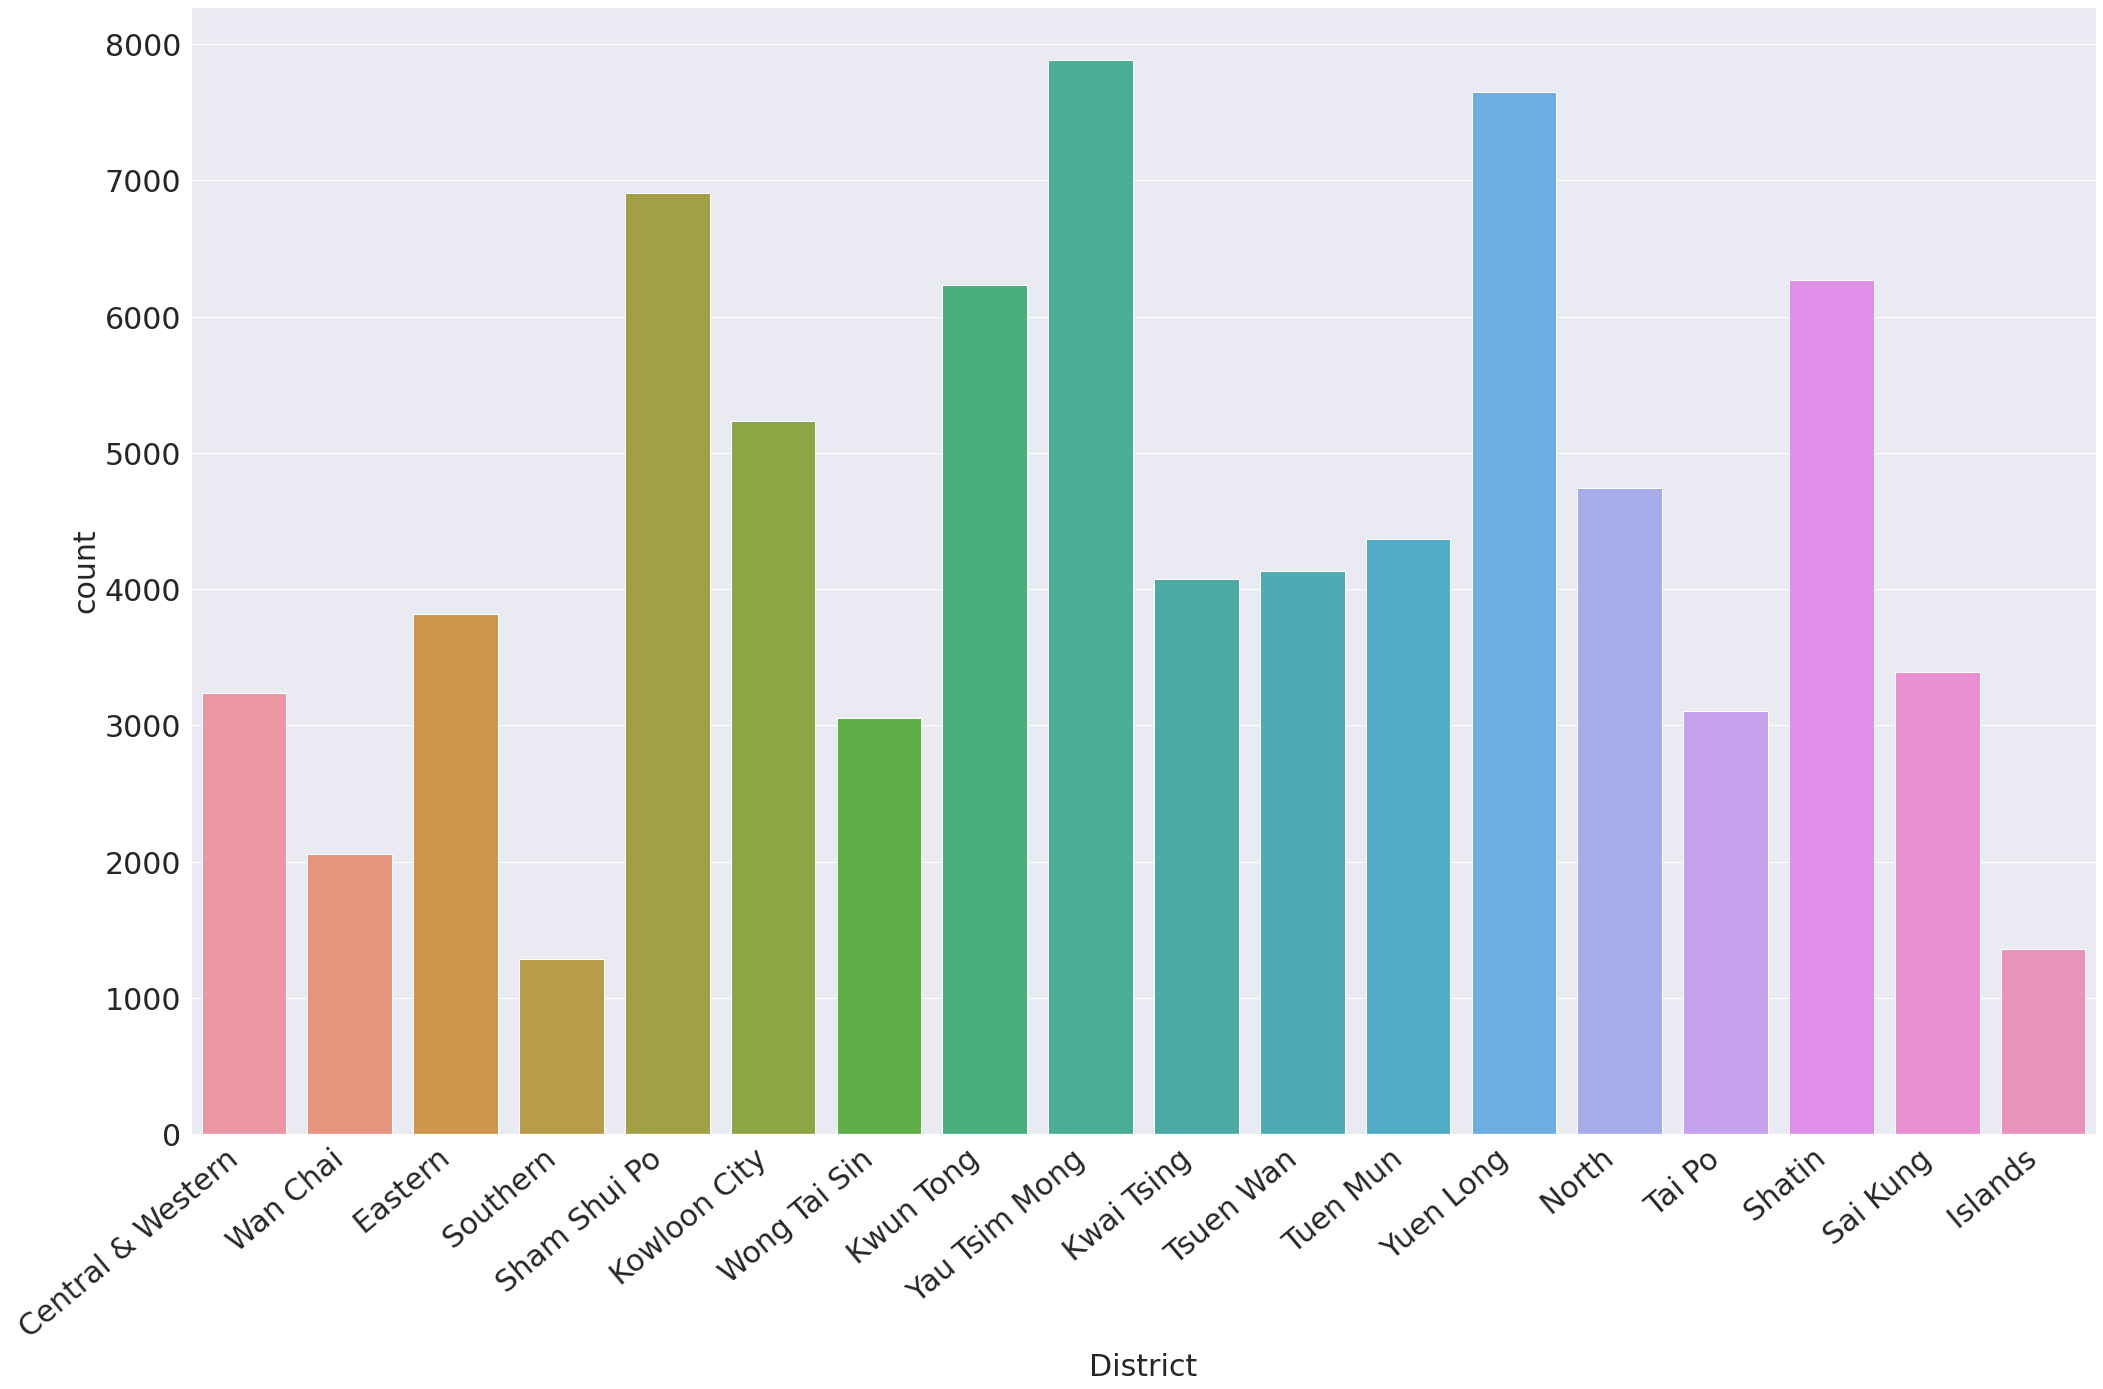

In [ ]:
ax = sns.countplot(data= home_confinees_tier2_building_df, x='District')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
# fig, ax = plt.subplots()

# ax.bar(x=home_confinees_tier2_building_df['District'], y, width=1, edgecolor="white", linewidth=0.7)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

# plt.show()

In [ ]:
home_confinees_tier2_building_df['District'].value_counts().array
dcount = pd.DataFrame(home_confinees_tier2_building_df['District'].value_counts());
dcount.rename(columns={'District':'Count'},inplace=True)
dcount['District'] = dcount.index
dcount.reset_index(inplace=True)
dcount.index += 1
dcount.drop(columns='index',inplace=True)
dcount

Count            District
1    7881       Yau Tsim Mong
2    7650           Yuen Long
3    6906        Sham Shui Po
4    6271              Shatin
5    6231           Kwun Tong
6    5235        Kowloon City
7    4743               North
8    4369            Tuen Mun
9    4133           Tsuen Wan
10   4076          Kwai Tsing
11   3814             Eastern
12   3393            Sai Kung
13   3236   Central & Western
14   3102              Tai Po
15   3053        Wong Tai Sin
16   2057            Wan Chai
17   1356             Islands
18   1284            Southern

In [ ]:
# create a percentage array from District
(100 * home_confinees_tier2_building_df['District'].value_counts() / home_confinees_tier2_building_df['District'].value_counts().sum())

 Yau Tsim Mong        10.002538
 Yuen Long             9.709354
 Sham Shui Po          8.765072
 Shatin                7.959132
 Kwun Tong             7.908364
 Kowloon City          6.644244
 North                 6.019799
 Tuen Mun              5.545120
 Tsuen Wan             5.245590
 Kwai Tsing            5.173245
 Eastern               4.840716
 Sai Kung              4.306384
 Central & Western     4.107120
 Tai Po                3.937048
 Wong Tai Sin          3.874857
 Wan Chai              2.610737
 Islands               1.721031
 Southern              1.629648
Name: District, dtype: float64

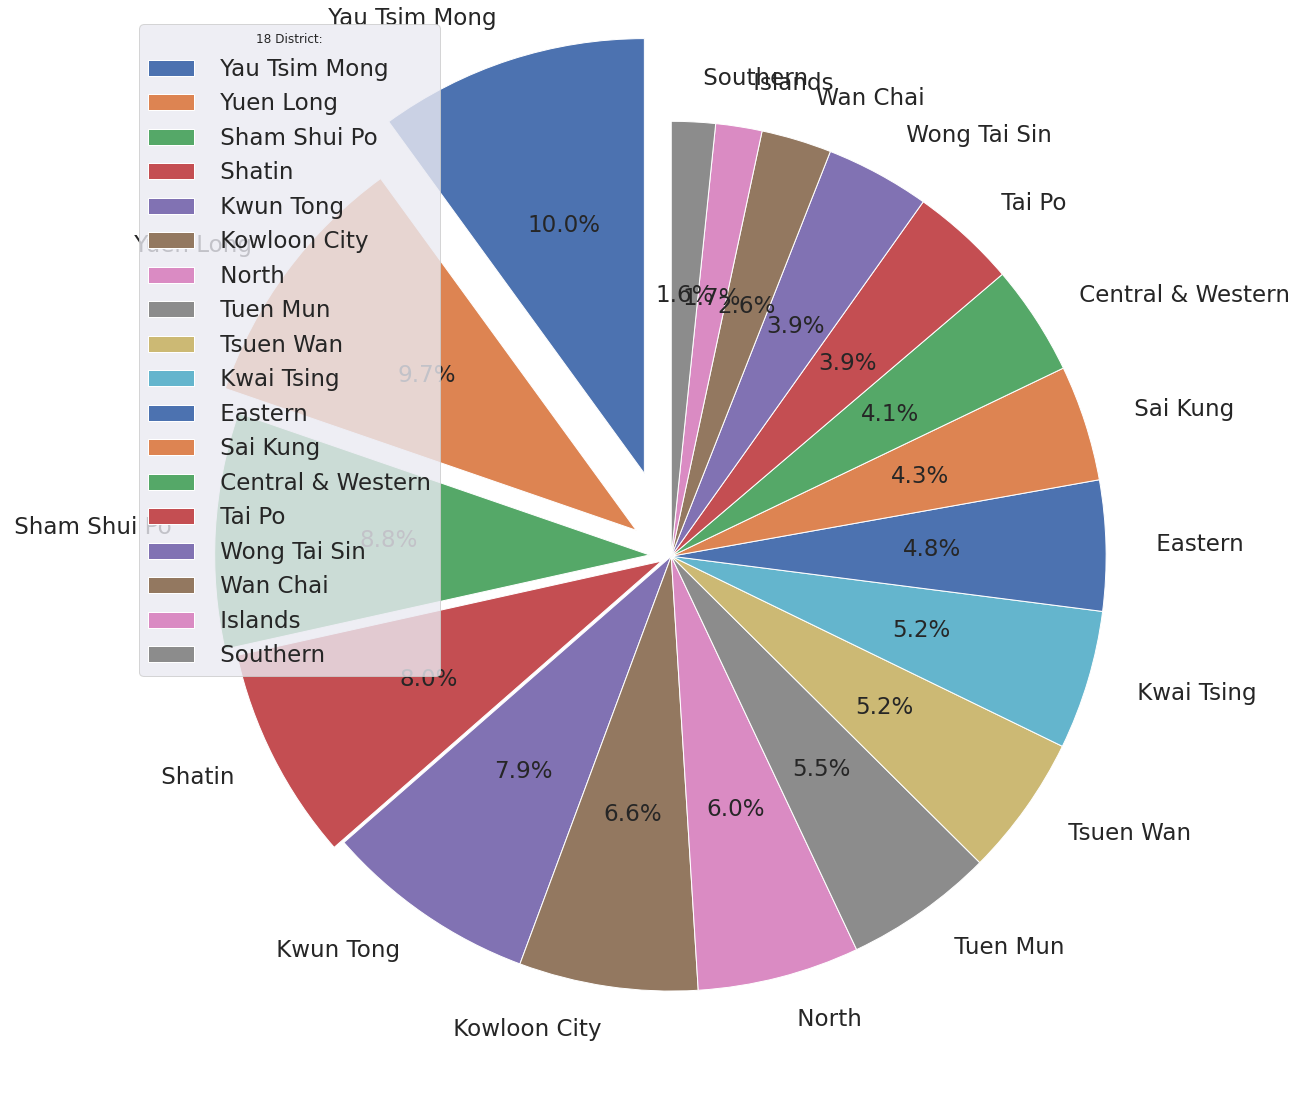

In [ ]:
import numpy as np
from matplotlib import cm
c = cm.Set1(np.arange(40)/40.)
y = (100 * home_confinees_tier2_building_df['District'].value_counts() / home_confinees_tier2_building_df['District'].value_counts().sum())
plt.pie(y.array, labels = y.index,explode=[0.2,0.1,0.05,0.025,0,0,0,0,0,0,0,0,0,0,0,0,0,0], startangle=90,autopct='%1.1f%%')
plt.legend(title="18 District:")
plt.show()


In [ ]:
#過去14天內有嚴重急性呼吸綜合症冠狀病毒2的陽性檢測個案曾到訪的大廈名單

# fetch
for u in tqdm(building_list_home_confinees_urls):
    building_list_home_confinees_df = pd.concat([building_list_home_confinees_df, pd.read_csv(u,index_col=False)])

100%|██████████| 19/19 [00:31<00:00,  1.68s/it]


In [ ]:
building_list_home_confinees_df.drop(columns="No.",inplace=True)


In [ ]:
dcount['District'].array

<PandasArray>
[    ' Yau Tsim Mong',         ' Yuen Long',      ' Sham Shui Po',
            ' Shatin',         ' Kwun Tong',      ' Kowloon City',
             ' North',          ' Tuen Mun',         ' Tsuen Wan',
        ' Kwai Tsing',           ' Eastern',          ' Sai Kung',
 ' Central & Western',            ' Tai Po',      ' Wong Tai Sin',
          ' Wan Chai',           ' Islands',          ' Southern']
Length: 18, dtype: object

In [ ]:
# https://www.had.gov.hk/psi/hong-kong-administrative-boundaries/hksar_18_district_boundary.json

In [ ]:
# fetch
del building_list_urls[698]

for u in tqdm(building_list_urls):
    building_list_df = pd.concat([building_list_df, pd.read_csv(u,index_col=False)])

100%|██████████| 776/776 [24:34<00:00,  1.90s/it]


In [ ]:
building_list_df

District         Building name  \
0        Shatin   Alva Hotel by Royal   
1        Shatin   Tower 1A, Oceanaire   
2       Shatin   Tower 1, Lake Silver   
3      Tuen Mun       South Hillcrest   
4       Eastern      Universal Towers   
...         ...                   ...   
4676  Yuen Long      Victory Building   
4677  Yuen Long        Luen Fat House   
4678  Yuen Long          Ki Lun Tsuen   
4679  Yuen Long         Lam Hau Tsuen   
4680  Yuen Long          Lam Hau Yuen   

     Date of the last case staying in the building during the symptomatic phase  \
0                                            20/01/2020                           
1                                            21/01/2020                           
2                                            23/01/2020                           
3                                            24/01/2020                           
4                                            25/01/2020                           
...                                                 ...                           
4676                                                NaN                           
4677                                                NaN                           
4678                                                NaN                           
4679                                                NaN                           
4680                                                NaN                           

     Related confirmed cases Last date of residence of the case(s)  \
0                        NaN                                   NaN   
1                        NaN                                   NaN   
2                        NaN                                   NaN   
3                        NaN                                   NaN   
4                        NaN                                   NaN   
...                      ...                                   ...   
4676                     NaN                                   NaN   
4677                     NaN                                   NaN   
4678                     NaN                                   NaN   
4679                     NaN                                   NaN   
4680                     NaN                                   NaN   

     Related probable/confirmed cases Last date of visit of the case(s)  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
...                               ...                               ...   
4676                              NaN                               NaN   
4677                              NaN                               NaN   
4678                              NaN                               NaN   
4679                              NaN                               NaN   
4680                              NaN                               NaN   

     Related cases  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
4676           NaN  
4677           NaN  
4678           NaN  
4679           NaN  
4680           NaN  

[599994 rows x 8 columns]

In [ ]:
# building_list_df = building_list_df.drop(columns={'Related confirmed cases','Last date of residence of the case(s)','Related probable/confirmed cases','Last date of visit of the case(s)','Related cases'})
building_list_df['District'].unique()


array(['Shatin', 'Shatin ', 'Tuen Mun', 'Eastern', 'Sai Kung',
       'Yau Tsim Mong', 'Central ', 'Kwai Tsing', 'Kowloon City',
       'Kwai Ching', 'Central', 'Kwun Tong', 'North District', 'Sha Tin',
       'Wong Tai Sin', 'Wan Chai', 'Southern District ', 'Sai Kung ',
       'Wan Chai ', 'Eastern District', 'Southern District',
       'Central and Western District ', 'Eastern ', 'North ', 'Southern',
       'Southern ', 'Central and Western ', 'Sham Shui Po', 'Yuen Long',
       'Tai Po', 'Central and Western', 'Yuen Long ', 'Kwun Tong ',
       'Yau Tsim Mong ', 'Islands', nan, 'Kowloon City\xa0',
       'Kowloon City?', 'Tsuen Wan ', 'Tsuen Wan', 'Sha Tin ',
       'Yau Tsim Mon', 'Kwai Tsing ', 'Yuen Long District', 'North',
       'Central & Western', 'Tai Hang', 'Kowloon City ',
       'Central &Western', 'Island', '8 Hysan Avenue', 'Shum Shui Po',
       'KOWLOON CITY', 'SAI KUNG', 'SHAM SHUI PO', 'WAN CHAI',
       'CENTRAL & WESTERN', 'TAI PO', 'SHA TIN', 'Kowloon CIty',
  

In [ ]:
building_list_df['District']= building_list_df['District'].str.strip()

building_list_df.drop(columns='Date of the last case staying in the building during the symptomatic phase')
x= building_list_df['District']
building_list_df2 = building_list_df.drop(building_list_df[~((x=='Yau Tsim Mong')|( x=='Yuen Long')|( x=='Sham Shui Po')| (x=='Shatin')| (x=='Kwun Tong')| (x=='Kowloon City ')| (x=='North')| (x=='Tuen Mun')| (x=='Tsuen Wan')| (x=='Kwai Tsing')| (x=='Eastern')| (x=='Sai Kung')| (x=='Central & Western')| (x=='Tai Po') | (x== 'Wong Tai Sin')| (x=='Wan Chai')| (x=='Islands')| (x=='Southern'))].index)
building_list_df2.reset_index(drop=True)


District                  Building name  \
0      Yuen Long               Ho Sing Building   
1      Yuen Long  Block 2, Ho Shun Yee Building   
2      Yuen Long  Block A, Ho Shun Tai Building   
3      Yuen Long           Ho Shun Fuk Building   
4      Yuen Long                 On Ga Building   
...          ...                            ...   
52962  Yuen Long               Victory Building   
52963  Yuen Long                 Luen Fat House   
52964  Yuen Long                   Ki Lun Tsuen   
52965  Yuen Long                  Lam Hau Tsuen   
52966  Yuen Long                   Lam Hau Yuen   

      Date of the last case staying in the building during the symptomatic phase  \
0                                                    NaN                           
1                                                    NaN                           
2                                                    NaN                           
3                                                    NaN                           
4                                                    NaN                           
...                                                  ...                           
52962                                                NaN                           
52963                                                NaN                           
52964                                                NaN                           
52965                                                NaN                           
52966                                                NaN                           

      Related confirmed cases Last date of residence of the case(s)  \
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   
...                       ...                                   ...   
52962                     NaN                                   NaN   
52963                     NaN                                   NaN   
52964                     NaN                                   NaN   
52965                     NaN                                   NaN   
52966                     NaN                                   NaN   

      Related probable/confirmed cases Last date of visit of the case(s)  \
0                                  NaN                               NaN   
1                                  NaN                               NaN   
2                                  NaN                               NaN   
3                                  NaN                               NaN   
4                                  NaN                               NaN   
...                                ...                               ...   
52962                              NaN                               NaN   
52963                              NaN                               NaN   
52964                              NaN                               NaN   
52965                              NaN                               NaN   
52966                              NaN                               NaN   

      Related cases  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
52962           NaN  
52963           NaN  
52964           NaN  
52965           NaN  
52966           NaN  

[52967 rows x 8 columns]

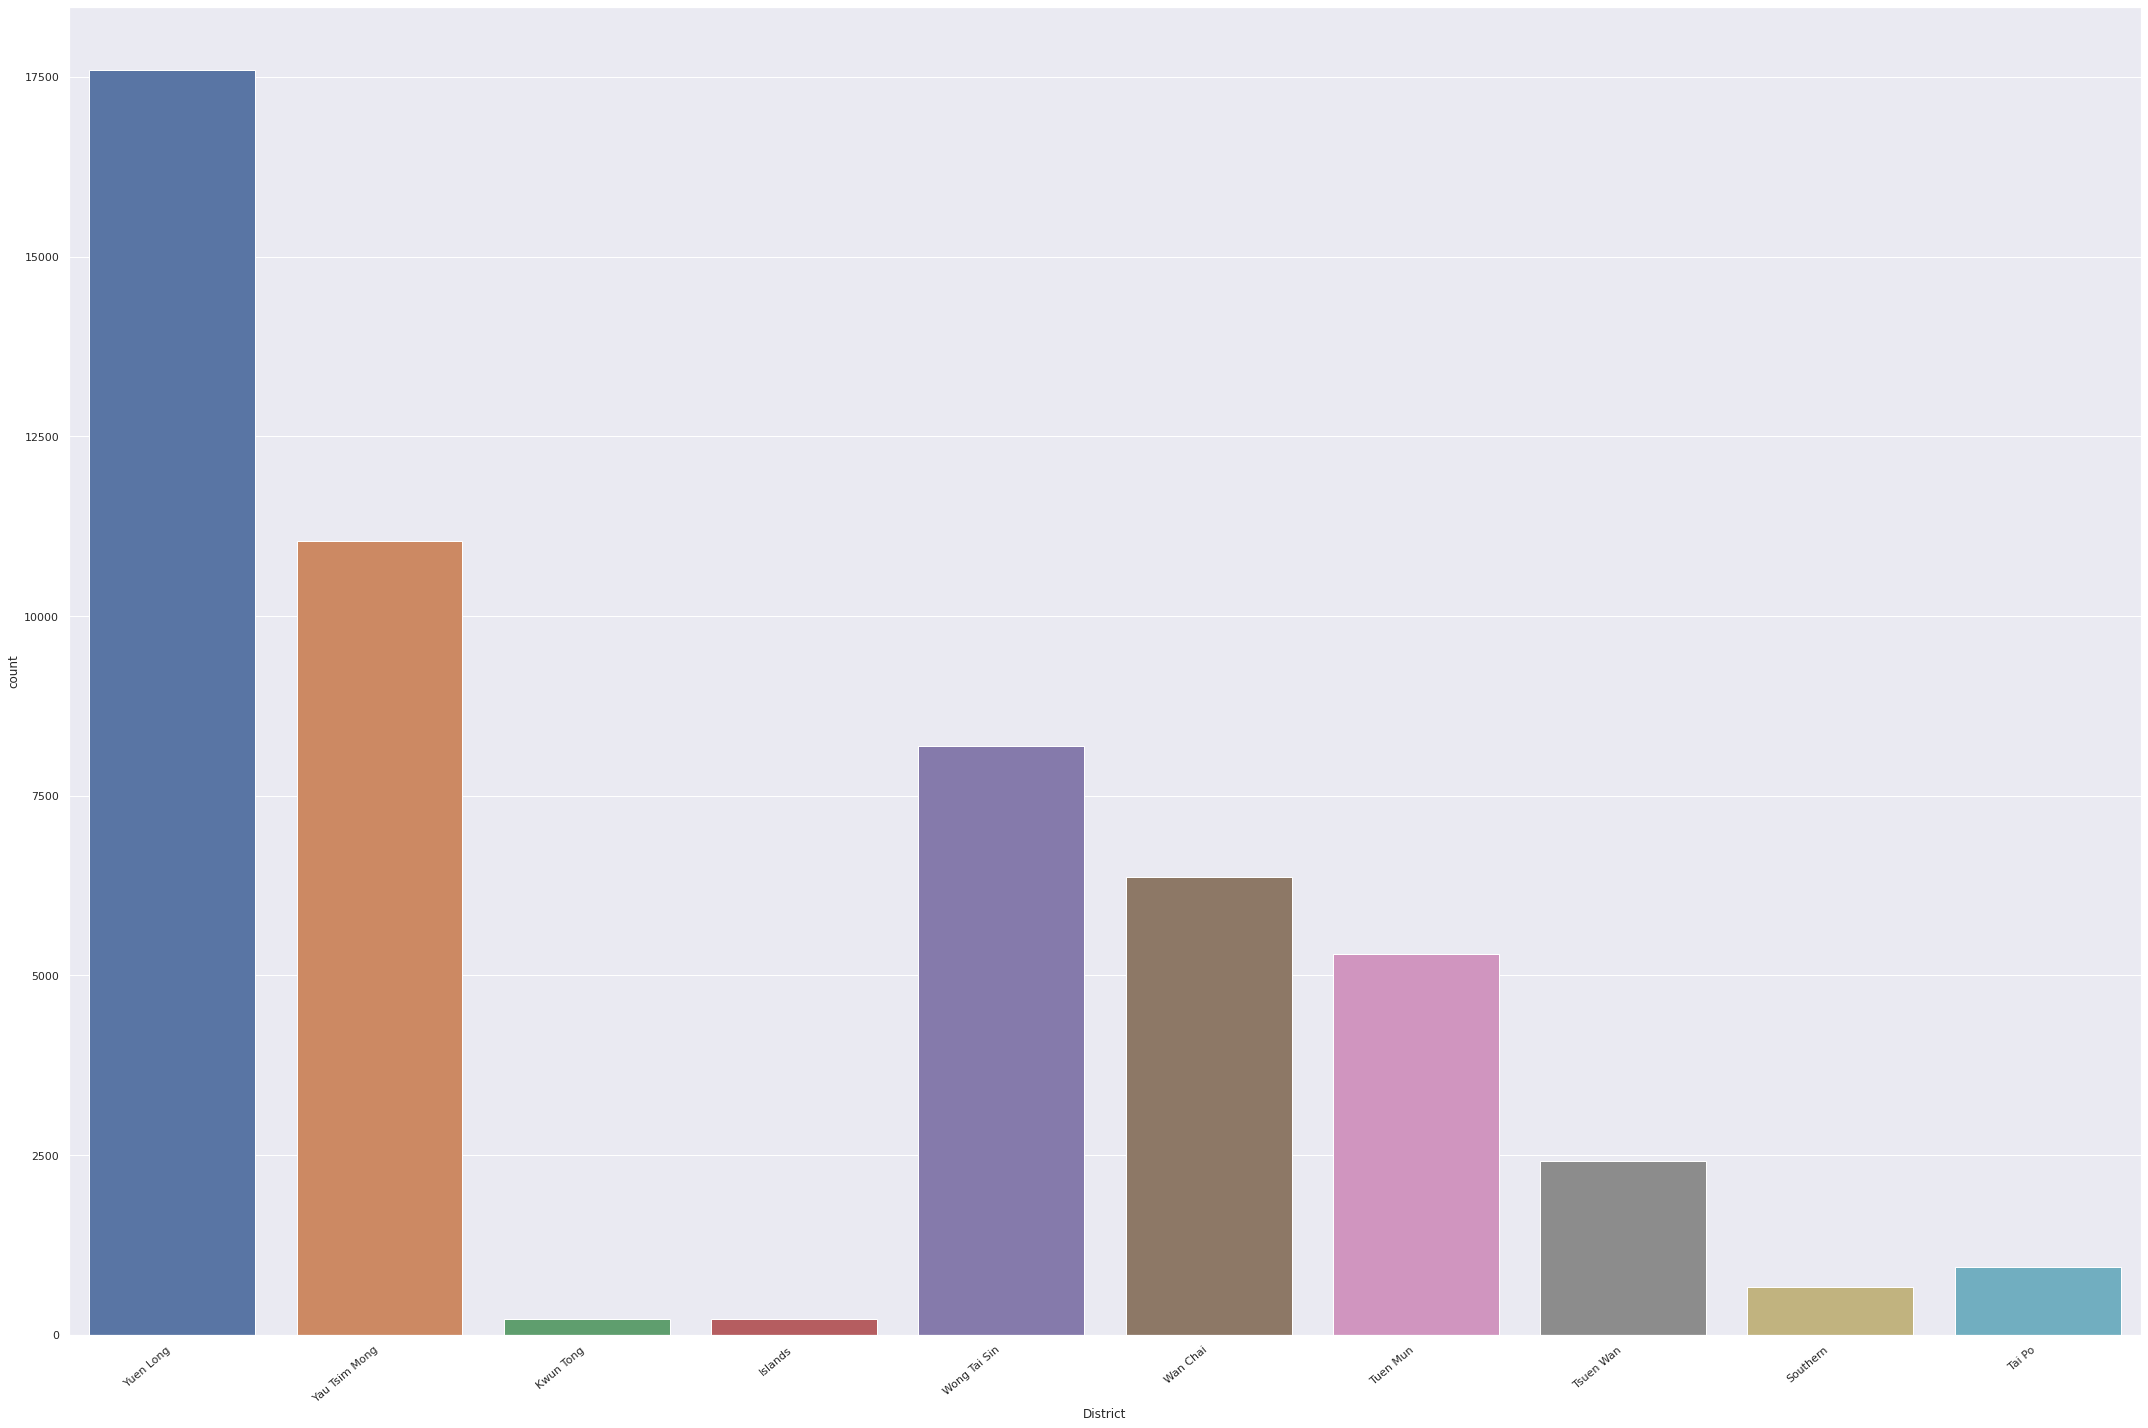

In [ ]:
ax = sns.countplot(data= building_list_df2, x='District')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas
import geopandas as gpd
gdf = gpd.read_file('/content/drive/MyDrive/CHP_CAP599C_QUARANTINE_V1_March.geojson')
gdf

id  OBJECTID  \
0      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62718   
1      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62720   
2      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62721   
3      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62722   
4      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62723   
...                                                  ...       ...   
92013  CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...     76926   
92014  CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...     77628   
92015  CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...     78260   
92016  CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...     79242   
92017  CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d4d...     61041   

      DISTRICT_EN DISTRICT_TC  \
0           North          北區   
1           North          北區   
2           North          北區   
3           North          北區   
4           North          北區   
...           ...         ...   
92013      Shatin          沙田   
92014    Sai Kung          西貢   
92015     Islands          離島   
92016     Eastern          東區   
92017   Yuen Long          元朗   

                                             BLDGNAME_EN       BLDGNAME_TC  \
0                                       NO.3 KA FU CLOSE             嘉富坊3號   
1                                 BLOCK 1, VIENNA GARDEN           維也納花園1座   
2                                      LOK FUNG BUILDING               樂豐樓   
3                                  NO.10 LUNG SUM AVENUE            龍琛路10號   
4                                     LO WU STATION ROAD               羅湖道   
...                                                  ...               ...   
92013          BLOCK E, MOSTOWN (PHASE 4), SUNSHINE CITY         新港城(4期)E座   
92014                SHEUNG YAN HOUSE, SHEUNG TAK ESTATE            尚德邨尚仁樓   
92015   GREENVALE VILLAGE, GREENERY COURT, DISCOVERY BAY          愉景灣頤峰靖山閣   
92016     BLOCK 1, ISLAND RESORT, NO.28 SIU SAI WAN ROAD     小西灣道28號藍灣半島1座   
92017  BLOCK 2, HO SHUN LEE BUILDING, NO.9 FUNG YAU S...  元朗 鳳攸南街9號好順利大廈2座   

         END_DATE   EASTING  NORTHING UPDATE_DATE  \
0      2020-03-21  830684.0  840878.0  2020-03-14   
1      2020-03-21  831478.0  839589.0  2020-03-14   
2      2020-03-21  832770.0  839959.0  2020-03-14   
3      2020-03-21  831427.0  840466.0  2020-03-14   
4      2020-03-21  830194.0  842843.0  2020-03-14   
...           ...       ...       ...         ...   
92013  2020-03-14  841990.0  831696.0  2020-03-15   
92014  2020-03-10  844619.0  819154.0  2020-03-15   
92015  2020-03-15  819109.0  818246.0  2020-03-15   
92016  2020-03-14  843831.0  814200.0  2020-03-18   
92017  2020-03-13  821650.0  833626.0  2020-03-14   

                            geometry  
0      POINT (830684.000 840878.000)  
1      POINT (831478.000 839589.000)  
2      POINT (832770.000 839959.000)  
3      POINT (831427.000 840466.000)  
4      POINT (830194.000 842843.000)  
...                              ...  
92013  POINT (841990.000 831696.000)  
92014  POINT (844619.000 819154.000)  
92015  POINT (819109.000 818246.000)  
92016  POINT (843831.000 814200.000)  
92017  POINT (821650.000 833626.000)  

[92018 rows x 11 columns]

In [ ]:
gdf.crs

<Projected CRS: EPSG:2326>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: China - Hong Kong - onshore and offshore.
- bounds: (113.76, 22.13, 114.51, 22.58)
Coordinate Operation:
- name: Hong Kong 1980 Grid
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [ ]:
gdf.to_crs("EPSG:4326",inplace=True)

In [ ]:
plt.rcParams['figure.figsize'] = [23, 16]

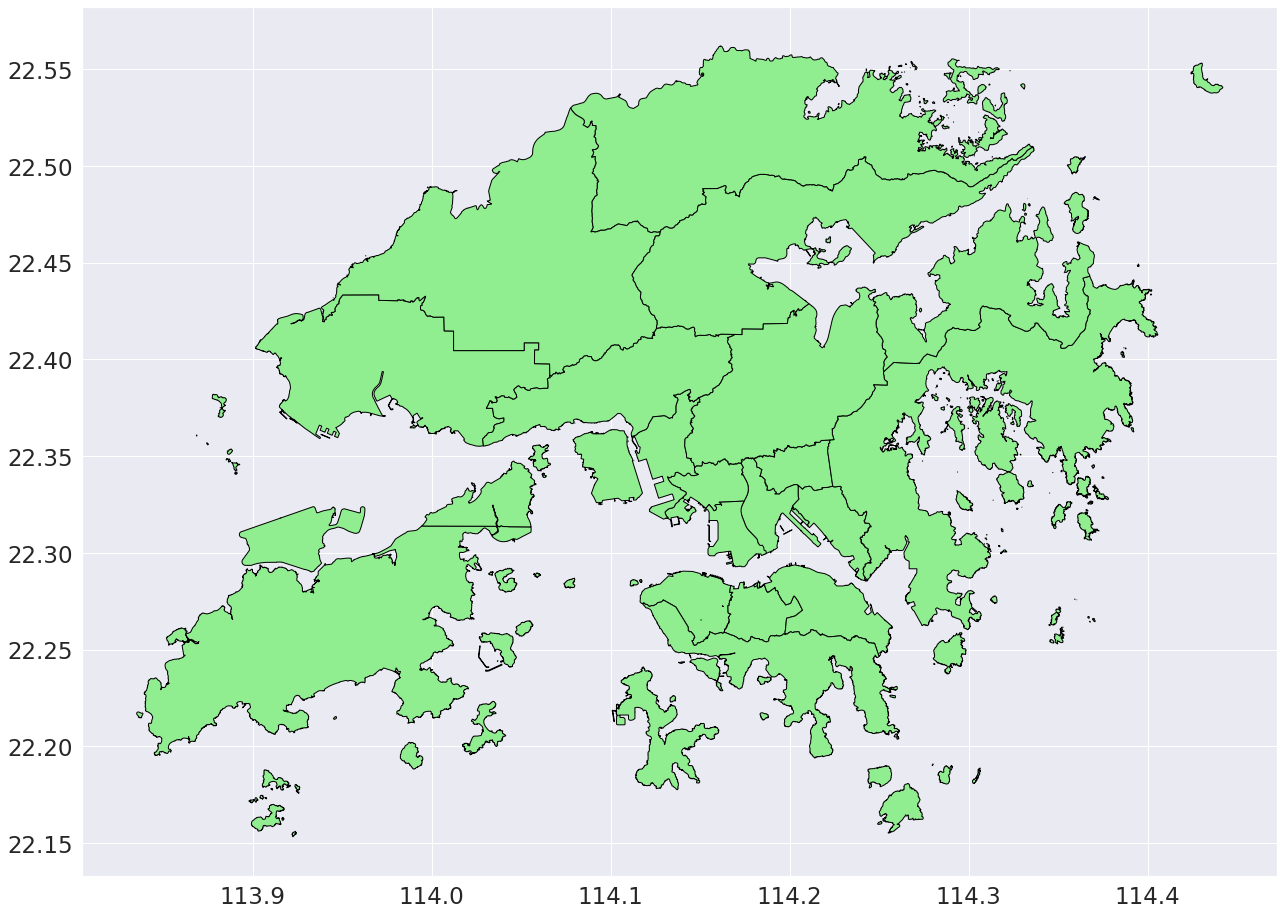

In [ ]:
hong_kong = gpd.read_file('/content/drive/MyDrive/Hong_Kong_18_Districts (1).geojson')
hong_kong.plot(color='lightgreen', edgecolor='black')

In [ ]:
hong_kong.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
hong_kong

OBJECTID    ID CNAME CNAME_S              ENAME  SHAPE_Length  SHAPE_Area  \
0          1   1.0  黃大仙區    黄大仙区       WONG TAI SIN      0.156228    0.000816   
1          2   6.0  九龍城區    九龙城区       KOWLOON CITY      0.273668    0.000884   
2          3   7.0   觀塘區     观塘区          KWUN TONG      0.220475    0.000987   
3          4   8.0   西貢區     西贡区           SAI KUNG      3.154700    0.011963   
4          5  11.0    北區      北区              NORTH      1.671697    0.012070   
5          6  13.0   中西區     中西区  CENTRAL & WESTERN      0.231894    0.001091   
6          7  14.0   灣仔區     湾仔区           WAN CHAI      0.168909    0.000867   
7          8  15.0    東區      东区            EASTERN      0.313439    0.001631   
8          9  17.0   屯門區     屯门区           TUEN MUN      0.859430    0.007402   
9         10  18.0   元朗區     元朗区          YUEN LONG      0.790774    0.012297   
10        11  16.0    南區      南区           SOUTHERN      0.976238    0.003469   
11        12   2.0   離島區     离岛区            ISLANDS      3.056692    0.015631   
12        13   4.0  深水埗區    深水埗区       SHAM SHUI PO      0.246298    0.000822   
13        14   5.0  油尖旺區    油尖旺区      YAU TSIM MONG      0.201043    0.000614   
14        15   3.0   葵青區     葵青区         KWAI TSING      0.487708    0.002046   
15        16  12.0   荃灣區     荃湾区          TSUEN WAN      0.830662    0.005474   
16        17   9.0   大埔區     大浦区             TAI PO      2.013693    0.012998   
17        18  10.0   沙田區     沙田区            SHA TIN      0.491069    0.006066   

                                             geometry  
0   MULTIPOLYGON (((114.17942 22.34905, 114.17946 ...  
1   MULTIPOLYGON (((114.17700 22.34904, 114.17702 ...  
2   MULTIPOLYGON (((114.24371 22.28620, 114.24370 ...  
3   MULTIPOLYGON (((114.22112 22.35318, 114.22114 ...  
4   MULTIPOLYGON (((114.33576 22.51003, 114.33576 ...  
5   MULTIPOLYGON (((114.14562 22.29045, 114.14990 ...  
6   MULTIPOLYGON (((114.20012 22.27387, 114.20047 ...  
7   MULTIPOLYGON (((114.24738 22.25339, 114.24733 ...  
8   MULTIPOLYGON (((113.93745 22.42638, 113.93765 ...  
9   MULTIPOLYGON (((113.93832 22.42696, 113.93843 ...  
10  MULTIPOLYGON (((114.11777 22.27384, 114.11853 ...  
11  MULTIPOLYGON (((113.92250 22.15339, 113.92241 ...  
12  MULTIPOLYGON (((114.16378 22.34855, 114.16380 ...  
13  MULTIPOLYGON (((114.16598 22.29967, 114.16590 ...  
14  MULTIPOLYGON (((114.09501 22.32524, 114.09501 ...  
15  MULTIPOLYGON (((114.03609 22.31379, 114.03612 ...  
16  MULTIPOLYGON (((114.27241 22.41548, 114.27397 ...  
17  MULTIPOLYGON (((114.21239 22.42765, 114.21239 ...

In [ ]:
gdf1 = gpd.read_file('/content/drive/MyDrive/CHP_CAP599A_QUARANTINE_V1_Feb.geojson')
gdf1

id  OBJECTID  \
0    CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       325   
1    CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       326   
2    CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       327   
3    CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       328   
4    CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       329   
..                                                 ...       ...   
481  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       319   
482  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       320   
483  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       322   
484  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       323   
485  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       324   

       DISTRICT_EN DISTRICT_TC  \
0        Yuen Long         元朗區   
1        Yuen Long         元朗區   
2            North          北區   
3          Sha Tin         沙田區   
4    Yau Tsim Mong        油尖旺區   
..             ...         ...   
481       Southern          南區   
482         Tai Po         大埔區   
483  Yau Tsim Mong        油尖旺區   
484  Yau Tsim Mong        油尖旺區   
485      Yuen Long         元朗區   

                                           BLDGNAME_EN     BLDGNAME_TC  \
0                       Tsz Ping House, Tin Tsz Estate          天慈村慈平樓   
1                          Wing Fu House, Tin Fu Court          天富苑榮富閣   
2                              Block A, Fanling Centre          粉嶺中心A座   
3                       Fontana Heights, Belair Garden         富豪花園富儷閣   
4                                       69 Bute Street           弼街69號   
..                                                 ...             ...   
481                  Lei Tim House, Ap Lei Chau Estate         鴨脷洲邨利添樓   
482         Hing Wo House, Po Nga Court, Tai Wo Estate       太和邨寶雅苑興和閣   
483  Hung Hom Hall, The Hong Kong Polytechnic Unive...  香港理工大學(紅磡)學生宿舍   
484                           Block 1, Victoria Towers           港景峰1座   
485                        Long Fu House, Tin Fu Court          天富苑朗富閣   

       END_DATE   EASTING  NORTHING UPDATE_DATE                       geometry  
0    2020-02-09  818785.0  834821.0  2020-02-10  POINT (818785.000 834821.000)  
1    2020-02-09  817878.0  836141.0  2020-02-10  POINT (817878.000 836141.000)  
2    2020-02-10  832736.0  838934.0  2020-02-10  POINT (832736.000 838934.000)  
3    2020-02-10  838574.0  827257.0  2020-02-10  POINT (838574.000 827257.000)  
4    2020-02-10  835629.0  820386.0  2020-02-10  POINT (835629.000 820386.000)  
..          ...       ...       ...         ...                            ...  
481  2020-02-09  833609.0  811773.0  2020-02-10  POINT (833609.000 811773.000)  
482  2020-02-09  834387.0  834588.0  2020-02-10  POINT (834387.000 834588.000)  
483  2020-02-09  837150.0  818329.0  2020-02-10  POINT (837150.000 818329.000)  
484  2020-02-09  835383.0  818119.0  2020-02-10  POINT (835383.000 818119.000)  
485  2020-02-09  817851.0  836053.0  2020-02-10  POINT (817851.000 836053.000)  

[486 rows x 11 columns]

In [ ]:
gdf1.to_crs("EPSG:4326",inplace=True)

In [ ]:
gdf2 = gdf.append(gdf1)

In [ ]:
gdf2

id  OBJECTID  \
0    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62718   
1    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62720   
2    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62721   
3    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62722   
4    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62723   
..                                                 ...       ...   
481  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       319   
482  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       320   
483  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       322   
484  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       323   
485  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       324   

       DISTRICT_EN DISTRICT_TC  \
0            North          北區   
1            North          北區   
2            North          北區   
3            North          北區   
4            North          北區   
..             ...         ...   
481       Southern          南區   
482         Tai Po         大埔區   
483  Yau Tsim Mong        油尖旺區   
484  Yau Tsim Mong        油尖旺區   
485      Yuen Long         元朗區   

                                           BLDGNAME_EN     BLDGNAME_TC  \
0                                     NO.3 KA FU CLOSE           嘉富坊3號   
1                               BLOCK 1, VIENNA GARDEN         維也納花園1座   
2                                    LOK FUNG BUILDING             樂豐樓   
3                                NO.10 LUNG SUM AVENUE          龍琛路10號   
4                                   LO WU STATION ROAD             羅湖道   
..                                                 ...             ...   
481                  Lei Tim House, Ap Lei Chau Estate         鴨脷洲邨利添樓   
482         Hing Wo House, Po Nga Court, Tai Wo Estate       太和邨寶雅苑興和閣   
483  Hung Hom Hall, The Hong Kong Polytechnic Unive...  香港理工大學(紅磡)學生宿舍   
484                           Block 1, Victoria Towers           港景峰1座   
485                        Long Fu House, Tin Fu Court          天富苑朗富閣   

       END_DATE   EASTING  NORTHING UPDATE_DATE                    geometry  
0    2020-03-21  830684.0  840878.0  2020-03-14  POINT (114.12260 22.50753)  
1    2020-03-21  831478.0  839589.0  2020-03-14  POINT (114.13032 22.49589)  
2    2020-03-21  832770.0  839959.0  2020-03-14  POINT (114.14288 22.49924)  
3    2020-03-21  831427.0  840466.0  2020-03-14  POINT (114.12983 22.50381)  
4    2020-03-21  830194.0  842843.0  2020-03-14  POINT (114.11783 22.52528)  
..          ...       ...       ...         ...                         ...  
481  2020-02-09  833609.0  811773.0  2020-02-10  POINT (114.15108 22.24471)  
482  2020-02-09  834387.0  834588.0  2020-02-10  POINT (114.15860 22.45074)  
483  2020-02-09  837150.0  818329.0  2020-02-10  POINT (114.18543 22.30391)  
484  2020-02-09  835383.0  818119.0  2020-02-10  POINT (114.16829 22.30202)  
485  2020-02-09  817851.0  836053.0  2020-02-10  POINT (113.99794 22.46387)  

[92504 rows x 11 columns]

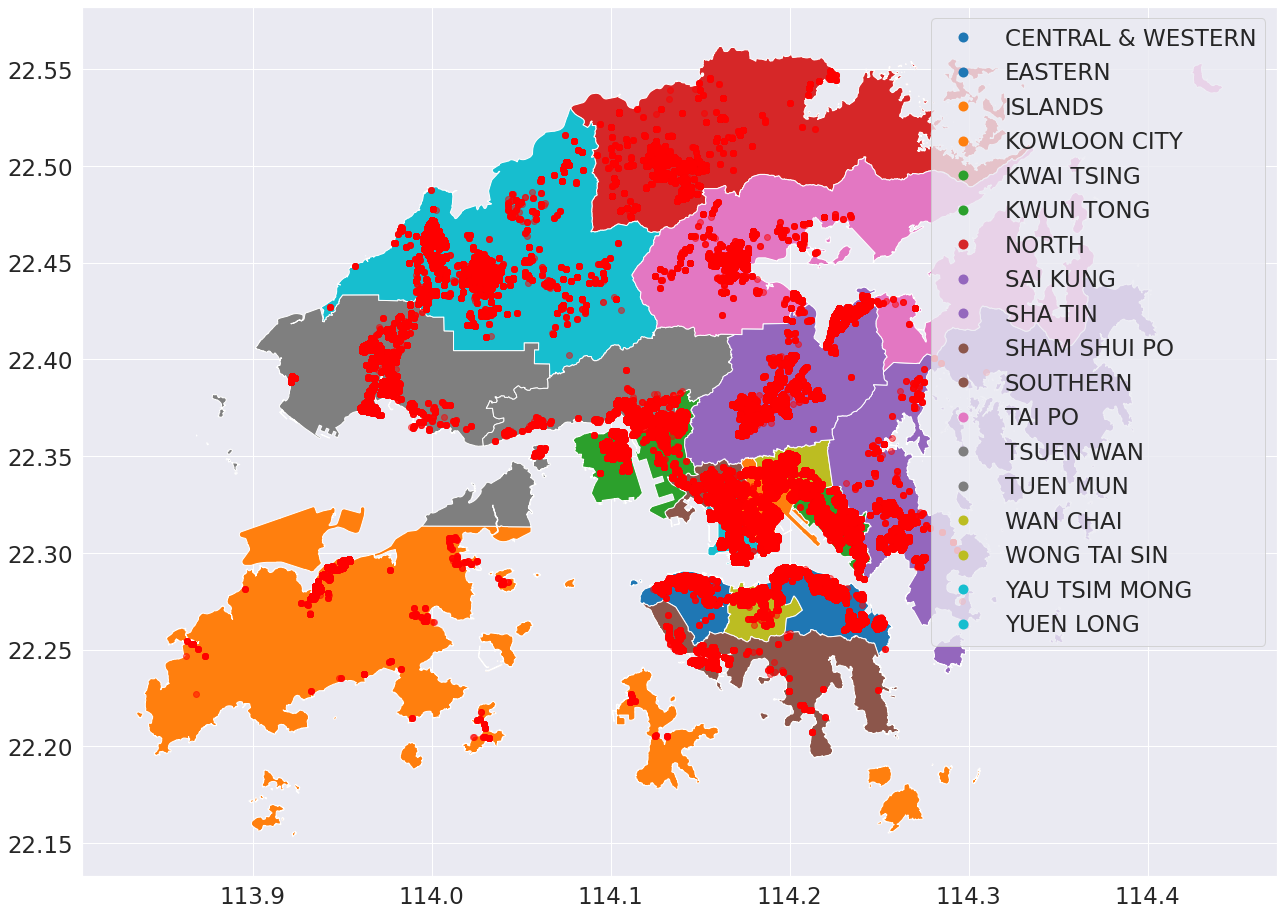

In [ ]:
axes = hong_kong.plot(column='ENAME',legend=True)
gdf2.plot(ax=axes, color='red', alpha = 0.5)

In [ ]:
gdf2.to_crs('EPSG:4326')

id  OBJECTID  \
0    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62718   
1    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62720   
2    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62721   
3    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62722   
4    CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62723   
..                                                 ...       ...   
481  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       319   
482  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       320   
483  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       322   
484  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       323   
485  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       324   

       DISTRICT_EN DISTRICT_TC  \
0            North          北區   
1            North          北區   
2            North          北區   
3            North          北區   
4            North          北區   
..             ...         ...   
481       Southern          南區   
482         Tai Po         大埔區   
483  Yau Tsim Mong        油尖旺區   
484  Yau Tsim Mong        油尖旺區   
485      Yuen Long         元朗區   

                                           BLDGNAME_EN     BLDGNAME_TC  \
0                                     NO.3 KA FU CLOSE           嘉富坊3號   
1                               BLOCK 1, VIENNA GARDEN         維也納花園1座   
2                                    LOK FUNG BUILDING             樂豐樓   
3                                NO.10 LUNG SUM AVENUE          龍琛路10號   
4                                   LO WU STATION ROAD             羅湖道   
..                                                 ...             ...   
481                  Lei Tim House, Ap Lei Chau Estate         鴨脷洲邨利添樓   
482         Hing Wo House, Po Nga Court, Tai Wo Estate       太和邨寶雅苑興和閣   
483  Hung Hom Hall, The Hong Kong Polytechnic Unive...  香港理工大學(紅磡)學生宿舍   
484                           Block 1, Victoria Towers           港景峰1座   
485                        Long Fu House, Tin Fu Court          天富苑朗富閣   

       END_DATE   EASTING  NORTHING UPDATE_DATE                    geometry  
0    2020-03-21  830684.0  840878.0  2020-03-14  POINT (114.12260 22.50753)  
1    2020-03-21  831478.0  839589.0  2020-03-14  POINT (114.13032 22.49589)  
2    2020-03-21  832770.0  839959.0  2020-03-14  POINT (114.14288 22.49924)  
3    2020-03-21  831427.0  840466.0  2020-03-14  POINT (114.12983 22.50381)  
4    2020-03-21  830194.0  842843.0  2020-03-14  POINT (114.11783 22.52528)  
..          ...       ...       ...         ...                         ...  
481  2020-02-09  833609.0  811773.0  2020-02-10  POINT (114.15108 22.24471)  
482  2020-02-09  834387.0  834588.0  2020-02-10  POINT (114.15860 22.45074)  
483  2020-02-09  837150.0  818329.0  2020-02-10  POINT (114.18543 22.30391)  
484  2020-02-09  835383.0  818119.0  2020-02-10  POINT (114.16829 22.30202)  
485  2020-02-09  817851.0  836053.0  2020-02-10  POINT (113.99794 22.46387)  

[92504 rows x 11 columns]

In [ ]:
gdf2 = gdf2.reset_index(drop=True)

In [ ]:
X = pd.DataFrame(gdf2['geometry'].x,columns=['x1'])

In [ ]:
X

x1
0      114.122603
1      114.130324
2      114.142879
3      114.129826
4      114.117833
...           ...
92499  114.151080
92500  114.158600
92501  114.185434
92502  114.168286
92503  113.997935

[92504 rows x 1 columns]

In [ ]:
X['x2'] = gdf2['geometry'].y


In [ ]:
X

x1         x2
0      114.122603  22.507532
1      114.130324  22.495894
2      114.142879  22.499239
3      114.129826  22.503814
4      114.117833  22.525275
...           ...        ...
92499  114.151080  22.244706
92500  114.158600  22.450739
92501  114.185434  22.303912
92502  114.168286  22.302016
92503  113.997935  22.463870

[92504 rows x 2 columns]

In [ ]:
X.dropna(inplace=True)

In [ ]:
X

x1         x2
0      114.122603  22.507532
1      114.130324  22.495894
2      114.142879  22.499239
3      114.129826  22.503814
4      114.117833  22.525275
...           ...        ...
92499  114.151080  22.244706
92500  114.158600  22.450739
92501  114.185434  22.303912
92502  114.168286  22.302016
92503  113.997935  22.463870

[92493 rows x 2 columns]

[4 4 4 ... 2 2 0]


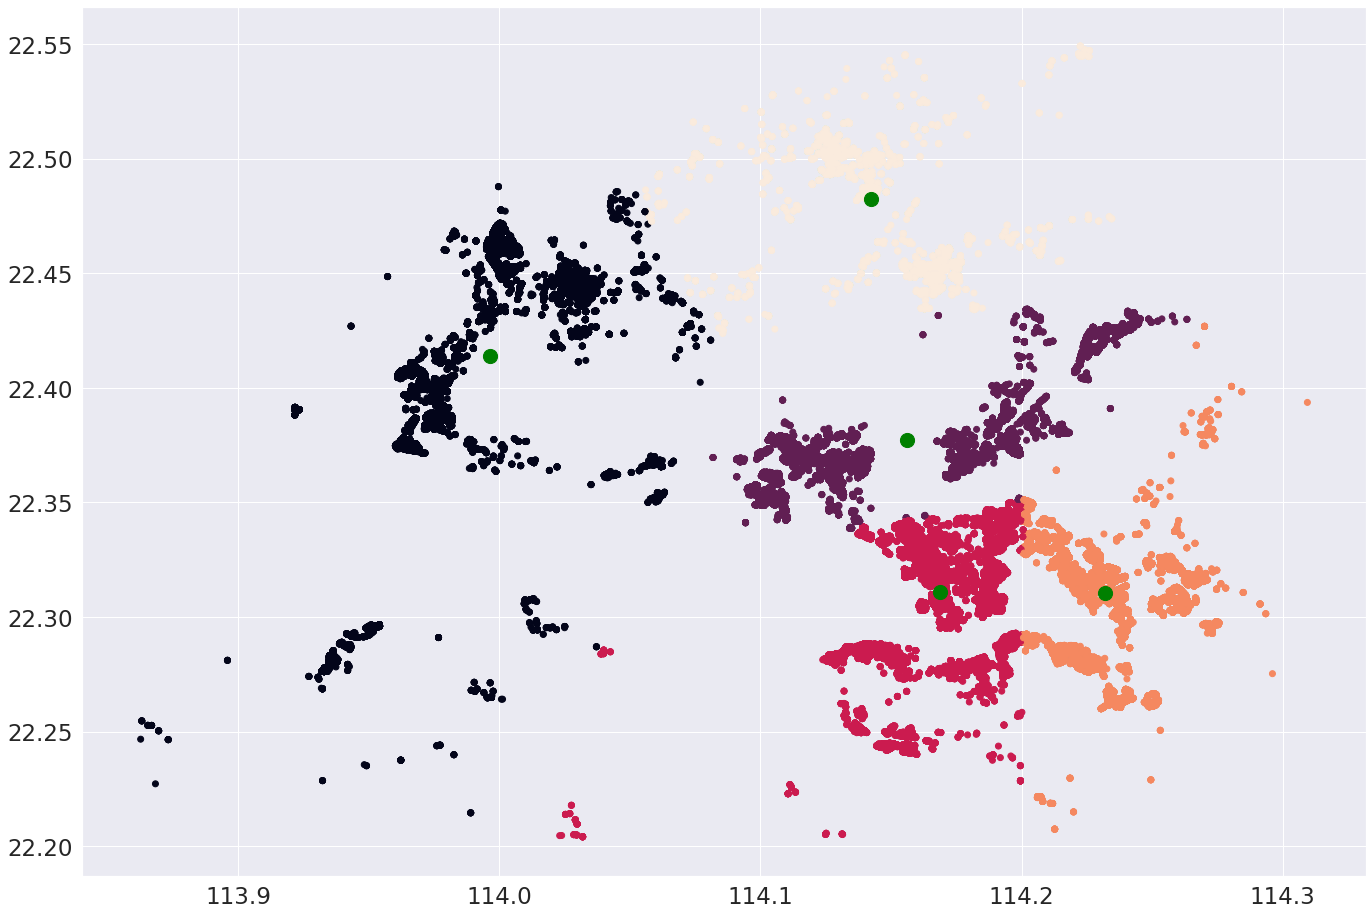

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(X['x1'], X['x2'], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200);

In [ ]:
centers

array([[113.9964001 ,  22.41372998],
       [114.15613178,  22.37714756],
       [114.16895863,  22.31093637],
       [114.23207647,  22.31064608],
       [114.14245259,  22.48227695]])

In [ ]:
gdf2.dropna(inplace=True)

In [ ]:
gdf2['center'] = y_kmeans

In [ ]:
gdf2

id  OBJECTID  \
0      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62718   
1      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62720   
2      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62721   
3      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62722   
4      CHP_CAP599C_QUARANTINE_V1.fid-5796fde3_1800d3a...     62723   
...                                                  ...       ...   
92499  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       319   
92500  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       320   
92501  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       322   
92502  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       323   
92503  CHP_CAP599A_QUARANTINE_V1.fid-5796fde3_1800d4d...       324   

         DISTRICT_EN DISTRICT_TC  \
0              North          北區   
1              North          北區   
2              North          北區   
3              North          北區   
4              North          北區   
...              ...         ...   
92499       Southern          南區   
92500         Tai Po         大埔區   
92501  Yau Tsim Mong        油尖旺區   
92502  Yau Tsim Mong        油尖旺區   
92503      Yuen Long         元朗區   

                                             BLDGNAME_EN     BLDGNAME_TC  \
0                                       NO.3 KA FU CLOSE           嘉富坊3號   
1                                 BLOCK 1, VIENNA GARDEN         維也納花園1座   
2                                      LOK FUNG BUILDING             樂豐樓   
3                                  NO.10 LUNG SUM AVENUE          龍琛路10號   
4                                     LO WU STATION ROAD             羅湖道   
...                                                  ...             ...   
92499                  Lei Tim House, Ap Lei Chau Estate         鴨脷洲邨利添樓   
92500         Hing Wo House, Po Nga Court, Tai Wo Estate       太和邨寶雅苑興和閣   
92501  Hung Hom Hall, The Hong Kong Polytechnic Unive...  香港理工大學(紅磡)學生宿舍   
92502                           Block 1, Victoria Towers           港景峰1座   
92503                        Long Fu House, Tin Fu Court          天富苑朗富閣   

         END_DATE   EASTING  NORTHING UPDATE_DATE                    geometry  \
0      2020-03-21  830684.0  840878.0  2020-03-14  POINT (114.12260 22.50753)   
1      2020-03-21  831478.0  839589.0  2020-03-14  POINT (114.13032 22.49589)   
2      2020-03-21  832770.0  839959.0  2020-03-14  POINT (114.14288 22.49924)   
3      2020-03-21  831427.0  840466.0  2020-03-14  POINT (114.12983 22.50381)   
4      2020-03-21  830194.0  842843.0  2020-03-14  POINT (114.11783 22.52528)   
...           ...       ...       ...         ...                         ...   
92499  2020-02-09  833609.0  811773.0  2020-02-10  POINT (114.15108 22.24471)   
92500  2020-02-09  834387.0  834588.0  2020-02-10  POINT (114.15860 22.45074)   
92501  2020-02-09  837150.0  818329.0  2020-02-10  POINT (114.18543 22.30391)   
92502  2020-02-09  835383.0  818119.0  2020-02-10  POINT (114.16829 22.30202)   
92503  2020-02-09  817851.0  836053.0  2020-02-10  POINT (113.99794 22.46387)   

       center  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
92499       2  
92500       4  
92501       2  
92502       2  
92503       0  

[92493 rows x 12 columns]

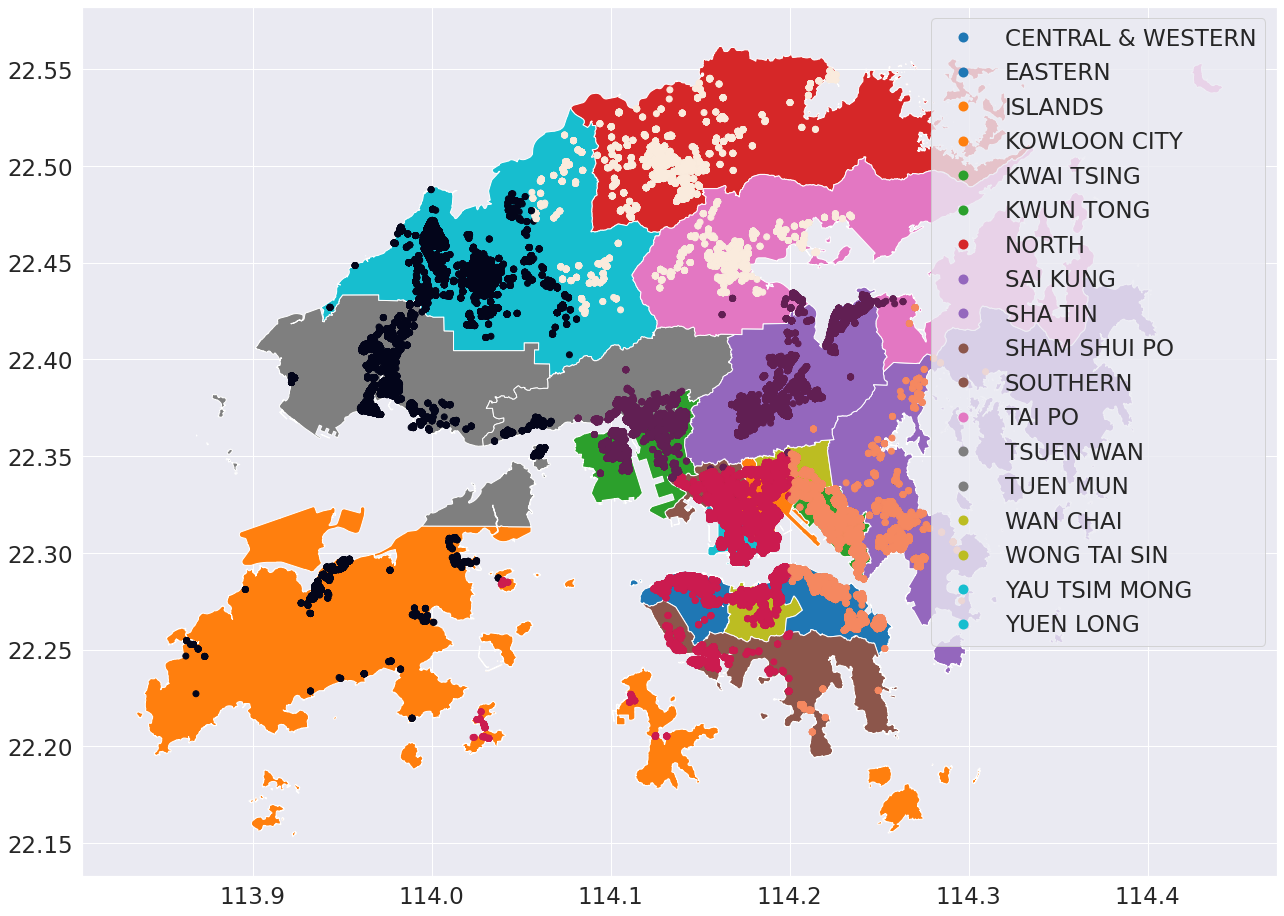

In [ ]:
axes = hong_kong.plot(column='ENAME',legend=True)
gdf2.plot(ax=axes, column='center')

[3 3 3 ... 0 0 6]


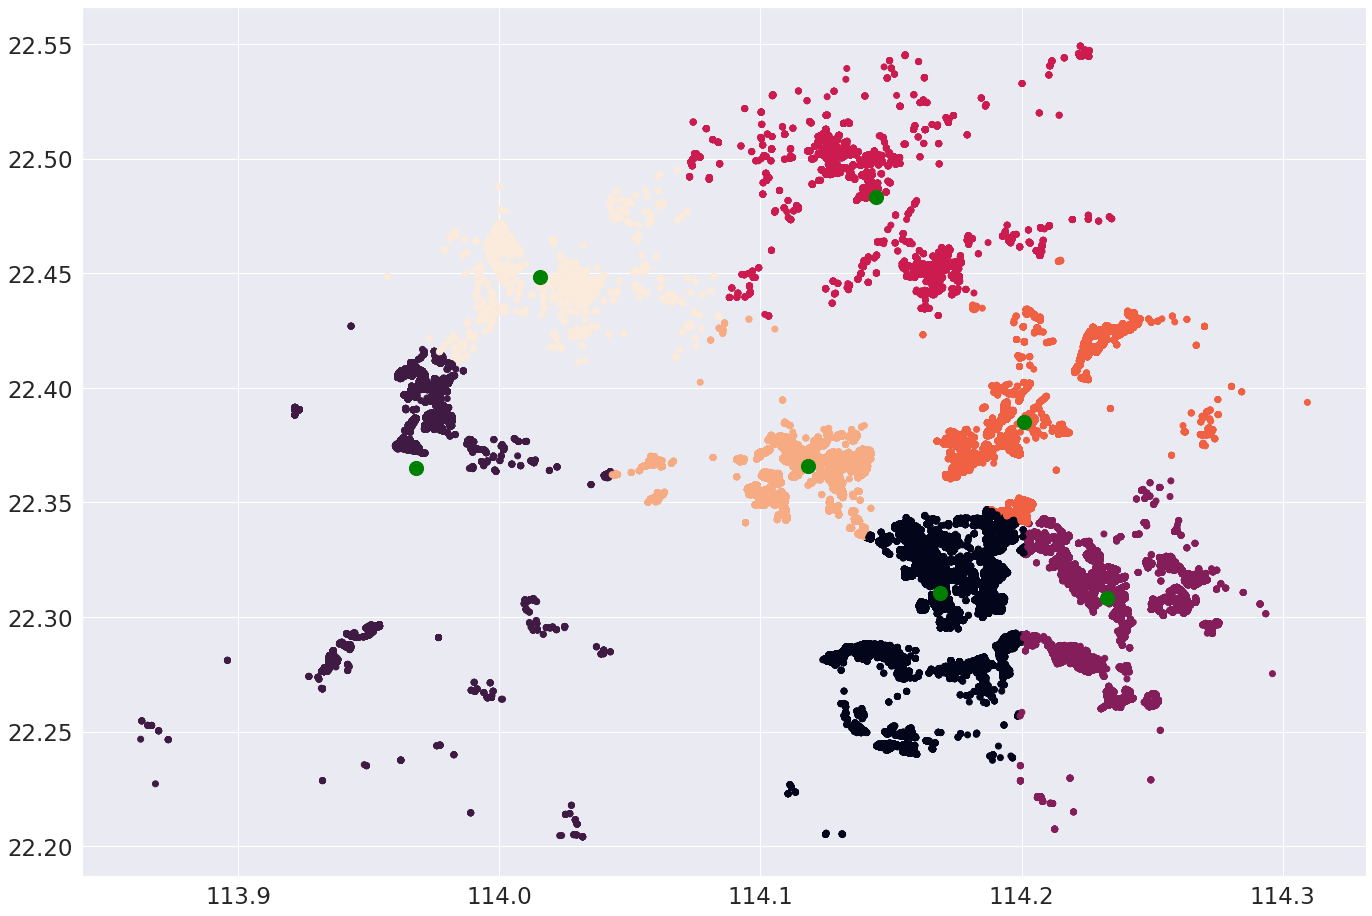

In [ ]:
# K = 7
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(X['x1'], X['x2'], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200);

In [ ]:
gdf2['center'] = y_kmeans

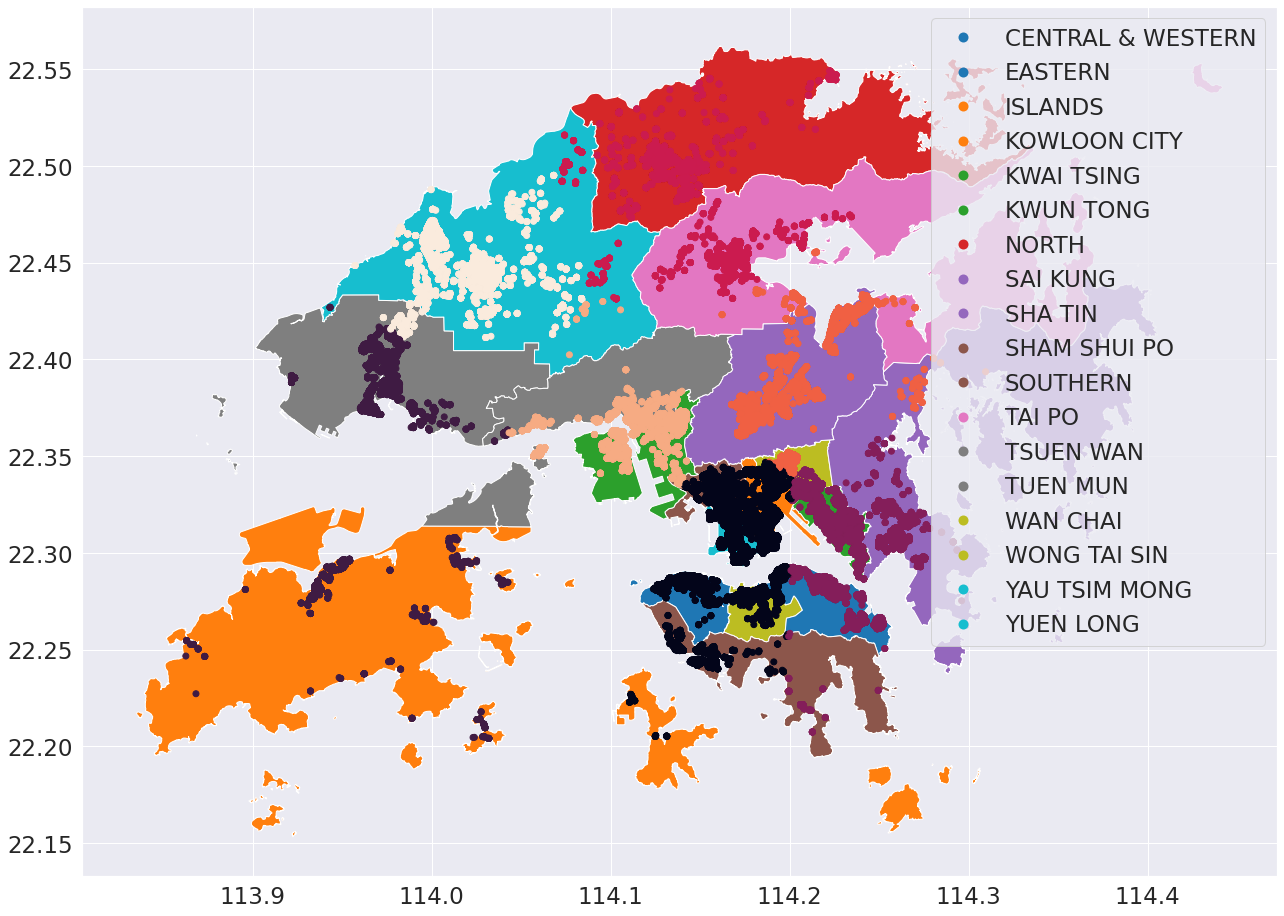

In [ ]:
axes = hong_kong.plot(column='ENAME',legend=True)
gdf2.plot(ax=axes, column='center')

## Task 2
19223277 Tam Chi Him

### Step 1

In [ ]:
# Task 2

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np
from tqdm import tqdm # for making progress bar
df = pd.read_csv('bar_vaccination_date.csv')
df1 = pd.read_csv('latest_situation_of_reported_cases_covid_19_eng.csv')
df.head(5)

date  firstDose.daily.sinovac  firstDose.daily.biontech  \
0  22/2/2021                     47.0                       0.0   
1  23/2/2021                    532.0                       0.0   
2  24/2/2021                      0.0                       0.0   
3  25/2/2021                      0.0                       0.0   
4  26/2/2021                   6044.0                       0.0   

   firstDose.daily.total  firstDose.cumulative.sinovac  \
0                   47.0                          47.0   
1                  532.0                         579.0   
2                    0.0                         579.0   
3                    0.0                         579.0   
4                 6044.0                        6623.0   

   firstDose.cumulative.biontech  firstDose.cumulative.total  \
0                            0.0                        47.0   
1                            0.0                       579.0   
2                            0.0                       579.0   
3                            0.0                       579.0   
4                            0.0                      6623.0   

   secondDose.daily.sinovac  secondDose.daily.biontech  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   secondDose.daily.total  ...  thirdDose.movingAvg.biontech  \
0                     0.0  ...                           NaN   
1                     0.0  ...                           NaN   
2                     0.0  ...                           NaN   
3                     0.0  ...                           NaN   
4                     0.0  ...                           NaN   

   totalDose.daily.sinovac  totalDose.daily.biontech  totalDose.daily.total  \
0                     47.0                       0.0                   47.0   
1                    532.0                       0.0                  532.0   
2                      0.0                       0.0                    0.0   
3                      0.0                       0.0                    0.0   
4                   6044.0                       0.0                 6044.0   

   totalDose.cumulative.sinovac  totalDose.cumulative.biontech  \
0                          47.0                            0.0   
1                         579.0                            0.0   
2                         579.0                            0.0   
3                         579.0                            0.0   
4                        6623.0                            0.0   

   totalDose.cumulative.total  totalDose.movingAvg.sinovac  \
0                        47.0                          NaN   
1                       579.0                          NaN   
2                       579.0                          NaN   
3                       579.0                          NaN   
4                      6623.0                          NaN   

   totalDose.movingAvg.biontech  totalDose.movingAvg.total  
0                           NaN                        NaN  
1                           NaN                        NaN  
2                           NaN                        NaN  
3                           NaN                        NaN  
4                           NaN                        NaN  

[5 rows x 37 columns]

In [ ]:
### Data Cleaning

In [ ]:
df = df.drop('firstDose.movingAvg.sinovac',axis = 1)
df = df.drop('firstDose.movingAvg.total',axis = 1)
df = df.drop('firstDose.movingAvg.biontech',axis = 1)
df = df.drop('secondDose.movingAvg.sinovac',axis = 1)
df = df.drop('secondDose.movingAvg.total',axis = 1)
df = df.drop('secondDose.movingAvg.biontech',axis = 1)
df = df.drop('thirdDose.movingAvg.sinovac',axis = 1)
df = df.drop('thirdDose.movingAvg.total',axis = 1)
df = df.drop('thirdDose.movingAvg.biontech',axis = 1)
df = df.drop('totalDose.movingAvg.sinovac',axis = 1)
df = df.drop('totalDose.movingAvg.biontech',axis = 1)
df = df.drop('totalDose.movingAvg.total',axis = 1)

In [ ]:
df.head()

date  firstDose.daily.sinovac  firstDose.daily.biontech  \
0  22/2/2021                     47.0                       0.0   
1  23/2/2021                    532.0                       0.0   
2  24/2/2021                      0.0                       0.0   
3  25/2/2021                      0.0                       0.0   
4  26/2/2021                   6044.0                       0.0   

   firstDose.daily.total  firstDose.cumulative.sinovac  \
0                   47.0                          47.0   
1                  532.0                         579.0   
2                    0.0                         579.0   
3                    0.0                         579.0   
4                 6044.0                        6623.0   

   firstDose.cumulative.biontech  firstDose.cumulative.total  \
0                            0.0                        47.0   
1                            0.0                       579.0   
2                            0.0                       579.0   
3                            0.0                       579.0   
4                            0.0                      6623.0   

   secondDose.daily.sinovac  secondDose.daily.biontech  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   secondDose.daily.total  ...  thirdDose.daily.total  \
0                     0.0  ...                    0.0   
1                     0.0  ...                    0.0   
2                     0.0  ...                    0.0   
3                     0.0  ...                    0.0   
4                     0.0  ...                    0.0   

   thirdDose.cumulative.sinovac  thirdDose.cumulative.biontech  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   thirdDose.cumulative.total  totalDose.daily.sinovac  \
0                         0.0                     47.0   
1                         0.0                    532.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                   6044.0   

   totalDose.daily.biontech  totalDose.daily.total  \
0                       0.0                   47.0   
1                       0.0                  532.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                 6044.0   

   totalDose.cumulative.sinovac  totalDose.cumulative.biontech  \
0                          47.0                            0.0   
1                         579.0                            0.0   
2                         579.0                            0.0   
3                         579.0                            0.0   
4                        6623.0                            0.0   

   totalDose.cumulative.total  
0                        47.0  
1                       579.0  
2                       579.0  
3                       579.0  
4                      6623.0  

[5 rows x 25 columns]

In [ ]:
df=df.dropna()
df.tail()

date  firstDose.daily.sinovac  firstDose.daily.biontech  \
398  27/3/2022                   1205.0                    1688.0   
399  28/3/2022                   2752.0                    1694.0   
400  29/3/2022                   2718.0                    1477.0   
401  30/3/2022                   2565.0                    1366.0   
402  31/3/2022                   2874.0                    1413.0   

     firstDose.daily.total  firstDose.cumulative.sinovac  \
398                 2893.0                     2807207.0   
399                 4446.0                     2809959.0   
400                 4195.0                     2812677.0   
401                 3931.0                     2815242.0   
402                 4287.0                     2818116.0   

     firstDose.cumulative.biontech  firstDose.cumulative.total  \
398                      3695418.0                   6502625.0   
399                      3697112.0                   6507071.0   
400                      3698589.0                   6511266.0   
401                      3699955.0                   6515197.0   
402                      3701368.0                   6519484.0   

     secondDose.daily.sinovac  secondDose.daily.biontech  \
398                    7417.0                     5122.0   
399                   16330.0                     5166.0   
400                   14601.0                     4828.0   
401                   14488.0                     4210.0   
402                   13753.0                     4032.0   

     secondDose.daily.total  ...  thirdDose.daily.total  \
398                 12539.0  ...                24263.0   
399                 21496.0  ...                25858.0   
400                 19429.0  ...                21800.0   
401                 18698.0  ...                19909.0   
402                 17785.0  ...                21977.0   

     thirdDose.cumulative.sinovac  thirdDose.cumulative.biontech  \
398                      904845.0                      1797078.0   
399                      912340.0                      1815441.0   
400                      918901.0                      1830680.0   
401                      925381.0                      1844109.0   
402                      931658.0                      1859809.0   

     thirdDose.cumulative.total  totalDose.daily.sinovac  \
398                   2701923.0                  13163.0   
399                   2727781.0                  26577.0   
400                   2749581.0                  23880.0   
401                   2769490.0                  23533.0   
402                   2791467.0                  22904.0   

     totalDose.daily.biontech  totalDose.daily.total  \
398                   26532.0                39695.0   
399                   25223.0                51800.0   
400                   21544.0                45424.0   
401                   19005.0                42538.0   
402                   21145.0                44049.0   

     totalDose.cumulative.sinovac  totalDose.cumulative.biontech  \
398                     6064750.0                      8879324.0   
399                     6091327.0                      8904547.0   
400                     6115207.0                      8926091.0   
401                     6138740.0                      8945096.0   
402                     6161644.0                      8966241.0   

     totalDose.cumulative.total  
398                  14944074.0  
399                  14995874.0  
400                  15041298.0  
401                  15083836.0  
402                  15127885.0  

[5 rows x 25 columns]

In [ ]:
df.head(5)

date  firstDose.daily.sinovac  firstDose.daily.biontech  \
0  22/2/2021                     47.0                       0.0   
1  23/2/2021                    532.0                       0.0   
2  24/2/2021                      0.0                       0.0   
3  25/2/2021                      0.0                       0.0   
4  26/2/2021                   6044.0                       0.0   

   firstDose.daily.total  firstDose.cumulative.sinovac  \
0                   47.0                          47.0   
1                  532.0                         579.0   
2                    0.0                         579.0   
3                    0.0                         579.0   
4                 6044.0                        6623.0   

   firstDose.cumulative.biontech  firstDose.cumulative.total  \
0                            0.0                        47.0   
1                            0.0                       579.0   
2                            0.0                       579.0   
3                            0.0                       579.0   
4                            0.0                      6623.0   

   secondDose.daily.sinovac  secondDose.daily.biontech  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   secondDose.daily.total  ...  thirdDose.daily.total  \
0                     0.0  ...                    0.0   
1                     0.0  ...                    0.0   
2                     0.0  ...                    0.0   
3                     0.0  ...                    0.0   
4                     0.0  ...                    0.0   

   thirdDose.cumulative.sinovac  thirdDose.cumulative.biontech  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   thirdDose.cumulative.total  totalDose.daily.sinovac  \
0                         0.0                     47.0   
1                         0.0                    532.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                   6044.0   

   totalDose.daily.biontech  totalDose.daily.total  \
0                       0.0                   47.0   
1                       0.0                  532.0   
2                       0.0                    0.0   
3                       0.0                    0.0   
4                       0.0                 6044.0   

   totalDose.cumulative.sinovac  totalDose.cumulative.biontech  \
0                          47.0                            0.0   
1                         579.0                            0.0   
2                         579.0                            0.0   
3                         579.0                            0.0   
4                        6623.0                            0.0   

   totalDose.cumulative.total  
0                        47.0  
1                       579.0  
2                       579.0  
3                       579.0  
4                      6623.0  

[5 rows x 25 columns]

In [ ]:
df1.tail(5)

As of date As of time  Number of confirmed cases  \
809  27/03/2022        NaN                        NaN   
810  28/03/2022        NaN                        NaN   
811  29/03/2022        NaN                        NaN   
812  30/03/2022        NaN                        NaN   
813  31/03/2022        NaN                        NaN   

     Number of ruled out cases  \
809                        NaN   
810                        NaN   
811                        NaN   
812                        NaN   
813                        NaN   

     Number of cases still hospitalised for investigation  \
809                                                NaN      
810                                                NaN      
811                                                NaN      
812                                                NaN      
813                                                NaN      

     Number of cases fulfilling the reporting criteria  Number of death cases  \
809                                                NaN                   7252   
810                                                NaN                   7420   
811                                                NaN                   7571   
812                                                NaN                   7706   
813                                                NaN                   7825   

     Number of discharge cases  Number of probable cases  \
809                      44007                       NaN   
810                      44418                       NaN   
811                      45671                       NaN   
812                      47140                       NaN   
813                      48556                       NaN   

     Number of hospitalised cases in critical condition  \
809                                              110.0    
810                                              108.0    
811                                               97.0    
812                                               89.0    
813                                               84.0    

     Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests  \
809                                           722901.0                            
810                                           726128.0                            
811                                           729292.0                            
812                                           732286.0                            
813                                           735145.0                            

     Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests  
809                                           405606.0                            
810                                           410064.0                            
811                                           414496.0                            
812                                           418483.0                            
813                                           422270.0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   As of date                                                                   814 non-null    object 
 1   As of time                                                                   194 non-null    object 
 2   Number of confirmed cases                                                    724 non-null    float64
 3   Number of ruled out cases                                                    89 non-null     float64
 4   Number of cases still hospitalised for investigation                         89 non-null     float64
 5   Number of cases fulfilling the reporting criteria                            89 non-null     float64
 6   Number of death cases                     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 402
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            403 non-null    object 
 1   firstDose.daily.sinovac         403 non-null    float64
 2   firstDose.daily.biontech        403 non-null    float64
 3   firstDose.daily.total           403 non-null    float64
 4   firstDose.cumulative.sinovac    403 non-null    float64
 5   firstDose.cumulative.biontech   403 non-null    float64
 6   firstDose.cumulative.total      403 non-null    float64
 7   secondDose.daily.sinovac        403 non-null    float64
 8   secondDose.daily.biontech       403 non-null    float64
 9   secondDose.daily.total          403 non-null    float64
 10  secondDose.cumulative.sinovac   403 non-null    float64
 11  secondDose.cumulative.biontech  403 non-null    float64
 12  secondDose.cumulative.total     403 

In [ ]:
df.isna().sum()

date                              0
firstDose.daily.sinovac           0
firstDose.daily.biontech          0
firstDose.daily.total             0
firstDose.cumulative.sinovac      0
firstDose.cumulative.biontech     0
firstDose.cumulative.total        0
secondDose.daily.sinovac          0
secondDose.daily.biontech         0
secondDose.daily.total            0
secondDose.cumulative.sinovac     0
secondDose.cumulative.biontech    0
secondDose.cumulative.total       0
thirdDose.daily.sinovac           0
thirdDose.daily.biontech          0
thirdDose.daily.total             0
thirdDose.cumulative.sinovac      0
thirdDose.cumulative.biontech     0
thirdDose.cumulative.total        0
totalDose.daily.sinovac           0
totalDose.daily.biontech          0
totalDose.daily.total             0
totalDose.cumulative.sinovac      0
totalDose.cumulative.biontech     0
totalDose.cumulative.total        0
dtype: int64

In [ ]:
df1.isna().sum()

As of date                                                                       0
As of time                                                                     620
Number of confirmed cases                                                       90
Number of ruled out cases                                                      725
Number of cases still hospitalised for investigation                           725
Number of cases fulfilling the reporting criteria                              725
Number of death cases                                                            0
Number of discharge cases                                                        0
Number of probable cases                                                        90
Number of hospitalised cases in critical condition                              89
Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests     724
Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests    780
dtyp

In [ ]:
df1 = df1.drop('As of time',axis = 1)

In [ ]:
### Replace na in "Number of confirmed cases" with "Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests"

In [ ]:
df1['Number of confirmed cases'] = np.where(
  df1['Number of confirmed cases'].isna(),
  df1['Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests'],
  df1['Number of confirmed cases']
)
df1[df1['Number of confirmed cases'].isna()]

Empty DataFrame
Columns: [As of date, Number of confirmed cases, Number of ruled out cases, Number of cases still hospitalised for investigation, Number of cases fulfilling the reporting criteria, Number of death cases, Number of discharge cases, Number of probable cases, Number of hospitalised cases in critical condition, Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests, Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests]
Index: []

In [ ]:
df1.tail()

As of date  Number of confirmed cases  Number of ruled out cases  \
809  27/03/2022                   722901.0                        NaN   
810  28/03/2022                   726128.0                        NaN   
811  29/03/2022                   729292.0                        NaN   
812  30/03/2022                   732286.0                        NaN   
813  31/03/2022                   735145.0                        NaN   

     Number of cases still hospitalised for investigation  \
809                                                NaN      
810                                                NaN      
811                                                NaN      
812                                                NaN      
813                                                NaN      

     Number of cases fulfilling the reporting criteria  Number of death cases  \
809                                                NaN                   7252   
810                                                NaN                   7420   
811                                                NaN                   7571   
812                                                NaN                   7706   
813                                                NaN                   7825   

     Number of discharge cases  Number of probable cases  \
809                      44007                       NaN   
810                      44418                       NaN   
811                      45671                       NaN   
812                      47140                       NaN   
813                      48556                       NaN   

     Number of hospitalised cases in critical condition  \
809                                              110.0    
810                                              108.0    
811                                               97.0    
812                                               89.0    
813                                               84.0    

     Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests  \
809                                           722901.0                            
810                                           726128.0                            
811                                           729292.0                            
812                                           732286.0                            
813                                           735145.0                            

     Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests  
809                                           405606.0                            
810                                           410064.0                            
811                                           414496.0                            
812                                           418483.0                            
813                                           422270.0

In [ ]:
df1.isna().sum()

As of date                                                                       0
Number of confirmed cases                                                        0
Number of ruled out cases                                                      725
Number of cases still hospitalised for investigation                           725
Number of cases fulfilling the reporting criteria                              725
Number of death cases                                                            0
Number of discharge cases                                                        0
Number of probable cases                                                        90
Number of hospitalised cases in critical condition                              89
Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests     724
Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests    780
dtype: int64

In [ ]:
df1.index = df1['As of date']
df1.index

Index(['08/01/2020', '09/01/2020', '10/01/2020', '11/01/2020', '12/01/2020',
       '13/01/2020', '14/01/2020', '15/01/2020', '16/01/2020', '17/01/2020',
       ...
       '22/03/2022', '23/03/2022', '24/03/2022', '25/03/2022', '26/03/2022',
       '27/03/2022', '28/03/2022', '29/03/2022', '30/03/2022', '31/03/2022'],
      dtype='object', name='As of date', length=814)

In [ ]:
df.index = df['date']
df.index

Index(['22/2/2021', '23/2/2021', '24/2/2021', '25/2/2021', '26/2/2021',
       '27/2/2021', '28/2/2021', '1/3/2021', '2/3/2021', '3/3/2021',
       ...
       '22/3/2022', '23/3/2022', '24/3/2022', '25/3/2022', '26/3/2022',
       '27/3/2022', '28/3/2022', '29/3/2022', '30/3/2022', '31/3/2022'],
      dtype='object', name='date', length=403)

In [ ]:
df1.index = pd.to_datetime(df1.index.astype(str),format="%d/%m/%Y")
df1.index

DatetimeIndex(['2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
               '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', name='As of date', length=814, freq=None)

In [ ]:
df.index = pd.to_datetime(df.index.astype(str),format="%d/%m/%Y")
df.index

DatetimeIndex(['2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01',
               '2021-03-02', '2021-03-03',
               ...
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', name='date', length=403, freq=None)

In [ ]:
df = df.join(df1['Number of confirmed cases'].loc['2021-02-22':'2022-03-31'])

In [ ]:
df = df.join(df1['Number of death cases'].loc['2021-02-22':'2022-03-31'])

In [ ]:
df = df.drop(['date'],axis=1)

In [ ]:
df.head()

firstDose.daily.sinovac  firstDose.daily.biontech  \
date                                                            
2021-02-22                     47.0                       0.0   
2021-02-23                    532.0                       0.0   
2021-02-24                      0.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                   6044.0                       0.0   

            firstDose.daily.total  firstDose.cumulative.sinovac  \
date                                                              
2021-02-22                   47.0                          47.0   
2021-02-23                  532.0                         579.0   
2021-02-24                    0.0                         579.0   
2021-02-25                    0.0                         579.0   
2021-02-26                 6044.0                        6623.0   

            firstDose.cumulative.biontech  firstDose.cumulative.total  \
date                                                                    
2021-02-22                            0.0                        47.0   
2021-02-23                            0.0                       579.0   
2021-02-24                            0.0                       579.0   
2021-02-25                            0.0                       579.0   
2021-02-26                            0.0                      6623.0   

            secondDose.daily.sinovac  secondDose.daily.biontech  \
date                                                              
2021-02-22                       0.0                        0.0   
2021-02-23                       0.0                        0.0   
2021-02-24                       0.0                        0.0   
2021-02-25                       0.0                        0.0   
2021-02-26                       0.0                        0.0   

            secondDose.daily.total  secondDose.cumulative.sinovac  ...  \
date                                                               ...   
2021-02-22                     0.0                            0.0  ...   
2021-02-23                     0.0                            0.0  ...   
2021-02-24                     0.0                            0.0  ...   
2021-02-25                     0.0                            0.0  ...   
2021-02-26                     0.0                            0.0  ...   

            thirdDose.cumulative.biontech  thirdDose.cumulative.total  \
date                                                                    
2021-02-22                            0.0                         0.0   
2021-02-23                            0.0                         0.0   
2021-02-24                            0.0                         0.0   
2021-02-25                            0.0                         0.0   
2021-02-26                            0.0                         0.0   

            totalDose.daily.sinovac  totalDose.daily.biontech  \
date                                                            
2021-02-22                     47.0                       0.0   
2021-02-23                    532.0                       0.0   
2021-02-24                      0.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                   6044.0                       0.0   

            totalDose.daily.total  totalDose.cumulative.sinovac  \
date                                                              
2021-02-22                   47.0                          47.0   
2021-02-23                  532.0                         579.0   
2021-02-24                    0.0                         579.0   
2021-02-25                    0.0                         579.0   
2021-02-26                 6044.0                        6623.0   

            totalDose.cumulative.biontech  totalDose.cumulative.total  \
date                                                                    
2

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

firstDose.daily.sinovac  firstDose.daily.biontech  \
date                                                            
2021-02-22                     47.0                       0.0   
2021-02-23                    532.0                       0.0   
2021-02-24                      0.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                   6044.0                       0.0   
2021-02-27                   7039.0                       0.0   
2021-02-28                   7015.0                       0.0   
2021-03-01                   6408.0                       0.0   
2021-03-02                  13071.0                       0.0   
2021-03-03                  11666.0                       0.0   
2021-03-04                  10389.0                       0.0   
2021-03-05                  10138.0                       0.0   
2021-03-06                  11319.0                     336.0   
2021-03-07                   8120.0                     871.0   
2021-03-08                   9902.0                     923.0   
2021-03-09                   8797.0                     878.0   
2021-03-10                  11001.0                    6020.0   
2021-03-11                   9597.0                    5763.0   
2021-03-12                   9594.0                    6728.0   
2021-03-13                   8554.0                    6326.0   
2021-03-14                   7940.0                    5680.0   
2021-03-15                   8966.0                    6397.0   
2021-03-16                  10228.0                   13099.0   
2021-03-17                  13248.0                   11352.0   
2021-03-18                  11848.0                   10778.0   
2021-03-19                  11795.0                   15809.0   
2021-03-20                  11325.0                   15043.0   
2021-03-21                   9084.0                   14736.0   
2021-03-22                  10128.0                   15084.0   
2021-03-23                   9018.0                   14420.0   
2021-03-24                   8662.0                    1081.0   
2021-03-25                   8192.0                       0.0   
2021-03-26                   8519.0                       0.0   
2021-03-27                   7732.0                       0.0   
2021-03-28                   6635.0                       0.0   
2021-03-29                   6618.0                       0.0   
2021-03-30                   5405.0                       0.0   
2021-03-31                   5133.0                       0.0   
2021-04-01                   5224.0                       0.0   
2021-04-02                   5143.0                       0.0   
2021-04-03                   3625.0                       0.0   
2021-04-04                   3803.0                      26.0   
2021-04-05                   2851.0                    5248.0   
2021-04-06                   2682.0                   13035.0   
2021-04-07                   3074.0                   10256.0   
2021-04-08                   3297.0                   10159.0   
2021-04-09                   3450.0                   10701.0   
2021-04-10                   3259.0                   13042.0   
2021-04-11                   2499.0                   16511.0   
2021-04-12                   3152.0                   15464.0   
2021-04-13                   3750.0                   14105.0   
2021-04-14                   3910.0                   13045.0   
2021-04-15                   3976.0                   12659.0   
2021-04-16                   4542.0                   18344.0   
2021-04-17                   4018.0                   21431.0   
2021-04-18                   3583.0                   18986.0   
2021-04-19                   4974.0                   16515.0   
2021-04-20                   4616.0                   12672.0   
2021-04-21                   3888.0                   11324.0   
2021-04-22                   3832.0            

In [ ]:
df.isna().sum()

firstDose.daily.sinovac           0
firstDose.daily.biontech          0
firstDose.daily.total             0
firstDose.cumulative.sinovac      0
firstDose.cumulative.biontech     0
firstDose.cumulative.total        0
secondDose.daily.sinovac          0
secondDose.daily.biontech         0
secondDose.daily.total            0
secondDose.cumulative.sinovac     0
secondDose.cumulative.biontech    0
secondDose.cumulative.total       0
thirdDose.daily.sinovac           0
thirdDose.daily.biontech          0
thirdDose.daily.total             0
thirdDose.cumulative.sinovac      0
thirdDose.cumulative.biontech     0
thirdDose.cumulative.total        0
totalDose.daily.sinovac           0
totalDose.daily.biontech          0
totalDose.daily.total             0
totalDose.cumulative.sinovac      0
totalDose.cumulative.biontech     0
totalDose.cumulative.total        0
Number of confirmed cases         0
Number of death cases             0
dtype: int64

In [ ]:
###Calculate daily confirmed cases and death cases

In [ ]:
diffdf = df.diff(1)
diffdf.head()

firstDose.daily.sinovac  firstDose.daily.biontech  \
date                                                            
2021-02-22                      NaN                       NaN   
2021-02-23                    485.0                       0.0   
2021-02-24                   -532.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                   6044.0                       0.0   

            firstDose.daily.total  firstDose.cumulative.sinovac  \
date                                                              
2021-02-22                    NaN                           NaN   
2021-02-23                  485.0                         532.0   
2021-02-24                 -532.0                           0.0   
2021-02-25                    0.0                           0.0   
2021-02-26                 6044.0                        6044.0   

            firstDose.cumulative.biontech  firstDose.cumulative.total  \
date                                                                    
2021-02-22                            NaN                         NaN   
2021-02-23                            0.0                       532.0   
2021-02-24                            0.0                         0.0   
2021-02-25                            0.0                         0.0   
2021-02-26                            0.0                      6044.0   

            secondDose.daily.sinovac  secondDose.daily.biontech  \
date                                                              
2021-02-22                       NaN                        NaN   
2021-02-23                       0.0                        0.0   
2021-02-24                       0.0                        0.0   
2021-02-25                       0.0                        0.0   
2021-02-26                       0.0                        0.0   

            secondDose.daily.total  secondDose.cumulative.sinovac  \
date                                                                
2021-02-22                     NaN                            NaN   
2021-02-23                     0.0                            0.0   
2021-02-24                     0.0                            0.0   
2021-02-25                     0.0                            0.0   
2021-02-26                     0.0                            0.0   

            secondDose.cumulative.biontech  secondDose.cumulative.total  \
date                                                                      
2021-02-22                             NaN                          NaN   
2021-02-23                             0.0                          0.0   
2021-02-24                             0.0                          0.0   
2021-02-25                             0.0                          0.0   
2021-02-26                             0.0                          0.0   

            thirdDose.daily.sinovac  thirdDose.daily.biontech  \
date                                                            
2021-02-22                      NaN                       NaN   
2021-02-23                      0.0                       0.0   
2021-02-24                      0.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                      0.0                       0.0   

            thirdDose.daily.total  thirdDose.cumulative.sinovac  \
date                                                              
2021-02-22                    NaN                           NaN   
2021-02-23                    0.0                           0.0   
2021-02-24                    0.0                           0.0   
2021-02-25                    0.0                           0.0   
2021-02-26                    0.0                           0.0   

            thirdDose.cumulative.biontech  thirdDose.cumulative.total  \
date                                                                    
2021-02-22            

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
diffdf

firstDose.daily.sinovac  firstDose.daily.biontech  \
date                                                            
2021-02-22                      NaN                       NaN   
2021-02-23                    485.0                       0.0   
2021-02-24                   -532.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                   6044.0                       0.0   
2021-02-27                    995.0                       0.0   
2021-02-28                    -24.0                       0.0   
2021-03-01                   -607.0                       0.0   
2021-03-02                   6663.0                       0.0   
2021-03-03                  -1405.0                       0.0   
2021-03-04                  -1277.0                       0.0   
2021-03-05                   -251.0                       0.0   
2021-03-06                   1181.0                     336.0   
2021-03-07                  -3199.0                     535.0   
2021-03-08                   1782.0                      52.0   
2021-03-09                  -1105.0                     -45.0   
2021-03-10                   2204.0                    5142.0   
2021-03-11                  -1404.0                    -257.0   
2021-03-12                     -3.0                     965.0   
2021-03-13                  -1040.0                    -402.0   
2021-03-14                   -614.0                    -646.0   
2021-03-15                   1026.0                     717.0   
2021-03-16                   1262.0                    6702.0   
2021-03-17                   3020.0                   -1747.0   
2021-03-18                  -1400.0                    -574.0   
2021-03-19                    -53.0                    5031.0   
2021-03-20                   -470.0                    -766.0   
2021-03-21                  -2241.0                    -307.0   
2021-03-22                   1044.0                     348.0   
2021-03-23                  -1110.0                    -664.0   
2021-03-24                   -356.0                  -13339.0   
2021-03-25                   -470.0                   -1081.0   
2021-03-26                    327.0                       0.0   
2021-03-27                   -787.0                       0.0   
2021-03-28                  -1097.0                       0.0   
2021-03-29                    -17.0                       0.0   
2021-03-30                  -1213.0                       0.0   
2021-03-31                   -272.0                       0.0   
2021-04-01                     91.0                       0.0   
2021-04-02                    -81.0                       0.0   
2021-04-03                  -1518.0                       0.0   
2021-04-04                    178.0                      26.0   
2021-04-05                   -952.0                    5222.0   
2021-04-06                   -169.0                    7787.0   
2021-04-07                    392.0                   -2779.0   
2021-04-08                    223.0                     -97.0   
2021-04-09                    153.0                     542.0   
2021-04-10                   -191.0                    2341.0   
2021-04-11                   -760.0                    3469.0   
2021-04-12                    653.0                   -1047.0   
2021-04-13                    598.0                   -1359.0   
2021-04-14                    160.0                   -1060.0   
2021-04-15                     66.0                    -386.0   
2021-04-16                    566.0                    5685.0   
2021-04-17                   -524.0                    3087.0   
2021-04-18                   -435.0                   -2445.0   
2021-04-19                   1391.0                   -2471.0   
2021-04-20                   -358.0                   -3843.0   
2021-04-21                   -728.0                   -1348.0   
2021-04-22                    -56.0            

In [ ]:
df= df.drop(['Number of confirmed cases'],axis=1)
df= df.join(diffdf['Number of confirmed cases'].loc['2021-02-22':'2022-03-31'])

In [ ]:
df= df.drop(['Number of death cases'],axis=1)
df= df.join(diffdf['Number of death cases'].loc['2021-02-22':'2022-03-31'])

In [ ]:
df.head()

firstDose.daily.sinovac  firstDose.daily.biontech  \
date                                                            
2021-02-22                     47.0                       0.0   
2021-02-23                    532.0                       0.0   
2021-02-24                      0.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                   6044.0                       0.0   

            firstDose.daily.total  firstDose.cumulative.sinovac  \
date                                                              
2021-02-22                   47.0                          47.0   
2021-02-23                  532.0                         579.0   
2021-02-24                    0.0                         579.0   
2021-02-25                    0.0                         579.0   
2021-02-26                 6044.0                        6623.0   

            firstDose.cumulative.biontech  firstDose.cumulative.total  \
date                                                                    
2021-02-22                            0.0                        47.0   
2021-02-23                            0.0                       579.0   
2021-02-24                            0.0                       579.0   
2021-02-25                            0.0                       579.0   
2021-02-26                            0.0                      6623.0   

            secondDose.daily.sinovac  secondDose.daily.biontech  \
date                                                              
2021-02-22                       0.0                        0.0   
2021-02-23                       0.0                        0.0   
2021-02-24                       0.0                        0.0   
2021-02-25                       0.0                        0.0   
2021-02-26                       0.0                        0.0   

            secondDose.daily.total  secondDose.cumulative.sinovac  \
date                                                                
2021-02-22                     0.0                            0.0   
2021-02-23                     0.0                            0.0   
2021-02-24                     0.0                            0.0   
2021-02-25                     0.0                            0.0   
2021-02-26                     0.0                            0.0   

            secondDose.cumulative.biontech  secondDose.cumulative.total  \
date                                                                      
2021-02-22                             0.0                          0.0   
2021-02-23                             0.0                          0.0   
2021-02-24                             0.0                          0.0   
2021-02-25                             0.0                          0.0   
2021-02-26                             0.0                          0.0   

            thirdDose.daily.sinovac  thirdDose.daily.biontech  \
date                                                            
2021-02-22                      0.0                       0.0   
2021-02-23                      0.0                       0.0   
2021-02-24                      0.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                      0.0                       0.0   

            thirdDose.daily.total  thirdDose.cumulative.sinovac  \
date                                                              
2021-02-22                    0.0                           0.0   
2021-02-23                    0.0                           0.0   
2021-02-24                    0.0                           0.0   
2021-02-25                    0.0                           0.0   
2021-02-26                    0.0                           0.0   

            thirdDose.cumulative.biontech  thirdDose.cumulative.total  \
date                                                                    
2021-02-22            

In [ ]:
df.at['2021-02-22','Number of confirmed cases'] = 16

In [ ]:
df.at['2021-02-22','Number of death cases'] = 0

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

firstDose.daily.sinovac  firstDose.daily.biontech  \
date                                                            
2021-02-22                     47.0                       0.0   
2021-02-23                    532.0                       0.0   
2021-02-24                      0.0                       0.0   
2021-02-25                      0.0                       0.0   
2021-02-26                   6044.0                       0.0   
2021-02-27                   7039.0                       0.0   
2021-02-28                   7015.0                       0.0   
2021-03-01                   6408.0                       0.0   
2021-03-02                  13071.0                       0.0   
2021-03-03                  11666.0                       0.0   
2021-03-04                  10389.0                       0.0   
2021-03-05                  10138.0                       0.0   
2021-03-06                  11319.0                     336.0   
2021-03-07                   8120.0                     871.0   
2021-03-08                   9902.0                     923.0   
2021-03-09                   8797.0                     878.0   
2021-03-10                  11001.0                    6020.0   
2021-03-11                   9597.0                    5763.0   
2021-03-12                   9594.0                    6728.0   
2021-03-13                   8554.0                    6326.0   
2021-03-14                   7940.0                    5680.0   
2021-03-15                   8966.0                    6397.0   
2021-03-16                  10228.0                   13099.0   
2021-03-17                  13248.0                   11352.0   
2021-03-18                  11848.0                   10778.0   
2021-03-19                  11795.0                   15809.0   
2021-03-20                  11325.0                   15043.0   
2021-03-21                   9084.0                   14736.0   
2021-03-22                  10128.0                   15084.0   
2021-03-23                   9018.0                   14420.0   
2021-03-24                   8662.0                    1081.0   
2021-03-25                   8192.0                       0.0   
2021-03-26                   8519.0                       0.0   
2021-03-27                   7732.0                       0.0   
2021-03-28                   6635.0                       0.0   
2021-03-29                   6618.0                       0.0   
2021-03-30                   5405.0                       0.0   
2021-03-31                   5133.0                       0.0   
2021-04-01                   5224.0                       0.0   
2021-04-02                   5143.0                       0.0   
2021-04-03                   3625.0                       0.0   
2021-04-04                   3803.0                      26.0   
2021-04-05                   2851.0                    5248.0   
2021-04-06                   2682.0                   13035.0   
2021-04-07                   3074.0                   10256.0   
2021-04-08                   3297.0                   10159.0   
2021-04-09                   3450.0                   10701.0   
2021-04-10                   3259.0                   13042.0   
2021-04-11                   2499.0                   16511.0   
2021-04-12                   3152.0                   15464.0   
2021-04-13                   3750.0                   14105.0   
2021-04-14                   3910.0                   13045.0   
2021-04-15                   3976.0                   12659.0   
2021-04-16                   4542.0                   18344.0   
2021-04-17                   4018.0                   21431.0   
2021-04-18                   3583.0                   18986.0   
2021-04-19                   4974.0                   16515.0   
2021-04-20                   4616.0                   12672.0   
2021-04-21                   3888.0                   11324.0   
2021-04-22                   3832.0            

In [ ]:
###Data Visualisation 

<AxesSubplot:xlabel='date', ylabel='Number of confirmed cases'>

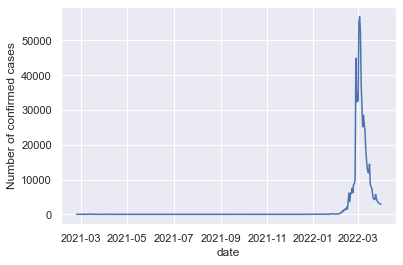

In [ ]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x=diffdf.index, y='Number of confirmed cases',
             data= diffdf)

<AxesSubplot:xlabel='date', ylabel='totalDose.daily.total'>

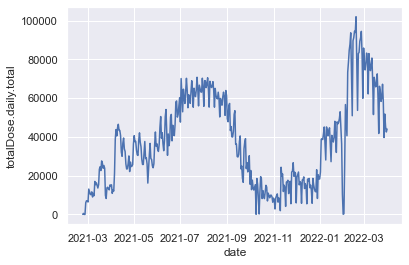

In [ ]:
# Plot the responses for different events and regions
sns.lineplot(x=df.index, y='totalDose.daily.total',
             data= df)

<AxesSubplot:xlabel='date', ylabel='Number of death cases'>

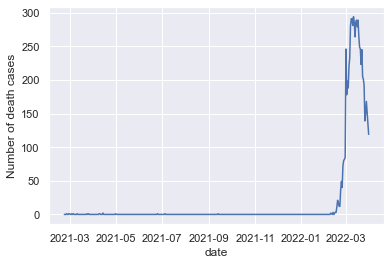

In [ ]:
# Plot the responses for different events and regions
sns.lineplot(x=df.index, y='Number of death cases',
             data= df)

<AxesSubplot:xlabel='date', ylabel='totalDose.daily.total'>

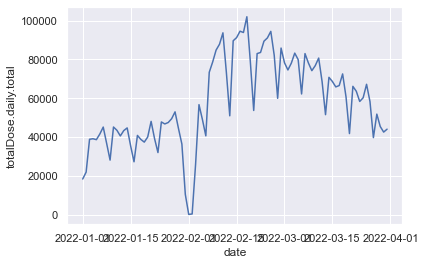

In [ ]:
sns.lineplot(x=df.loc['2022-01-01':'2022-03-31'].index, y='totalDose.daily.total',
             data=df.loc['2022-01-01':'2022-03-31'])

<AxesSubplot:xlabel='Number of confirmed cases', ylabel='totalDose.daily.total'>

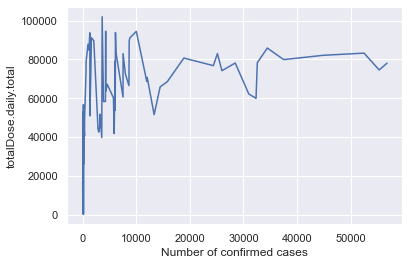

In [ ]:
sns.lineplot(x=df.loc['2021-12-01':'2022-03-31','Number of confirmed cases'], y='totalDose.daily.total',
             data=df.loc['2021-01-01':'2022-03-31'])

<AxesSubplot:xlabel='date', ylabel='Number of confirmed cases'>

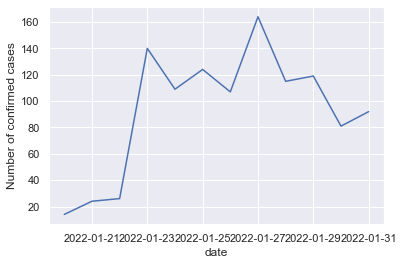

In [ ]:
sns.lineplot(x=df.loc['2022-01-20':'2022-01-31'].index, y='Number of confirmed cases',
             data=df.loc['2022-01-20':'2022-01-31'])

In [ ]:
###PCA dimension reduction 

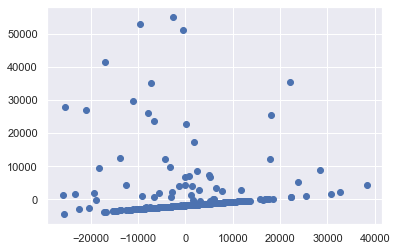

In [ ]:
from sklearn import decomposition
nonnullcolumns = [
  "Number of confirmed cases",
  "Number of death cases",
  'totalDose.daily.total'  
]

X = diffdf[nonnullcolumns].dropna()

# Apply principal component analysis for dimension reduction first
pca = decomposition.PCA(n_components=2)
pca.fit(X)
nopendingdiff2d = pca.transform(X)
plt.scatter(nopendingdiff2d[:,0], nopendingdiff2d[:,1])

In [ ]:
### K-mean clustering 

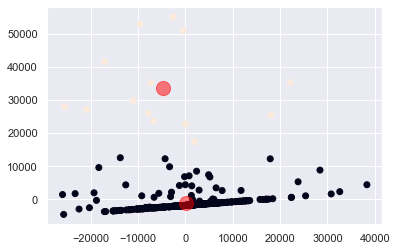

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(nopendingdiff2d)
y_kmeans = kmeans.predict(nopendingdiff2d)
plt.scatter(nopendingdiff2d[:, 0], nopendingdiff2d[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, alpha=0.5);

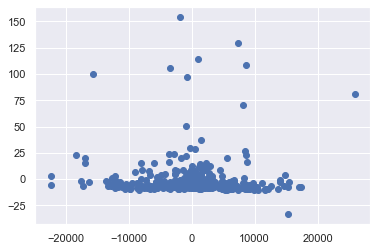

In [ ]:
data = diffdf[nonnullcolumns].dropna().loc['2021-02-22':'2022-01-31']

pca.fit(data)
data2d = pca.transform(data)

plt.scatter(data2d[:,0], data2d[:,1])

Regression model slope:     [-1.26906897e-17]
Regression model intercept: 8.286212661925355e-16


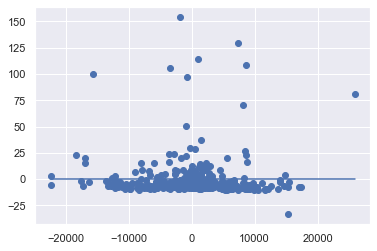

In [ ]:
from sklearn.linear_model import LinearRegression

x = data2d[:,0]
y = data2d[:,1]

linearreg = LinearRegression(fit_intercept=True)

# np.newaxis is to add a new dimension
linearreg.fit(x[:, np.newaxis], y)

print("Regression model slope:    ", linearreg.coef_)
print("Regression model intercept:", linearreg.intercept_)

xfit = np.array([x.min(), x.max()])
yfit = linearreg.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

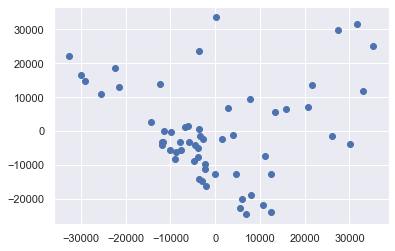

In [ ]:
data = diffdf[nonnullcolumns].dropna().loc['2022-02-01':'2022-03-31']

pca.fit(data)
data2d = pca.transform(data)

plt.scatter(data2d[:,0], data2d[:,1])

Regression model slope:     [3.56394235e-16]
Regression model intercept: 4.932852619785372e-13


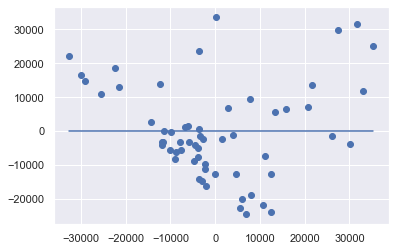

In [ ]:
from sklearn.linear_model import LinearRegression

x = data2d[:,0]
y = data2d[:,1]

linearreg = LinearRegression(fit_intercept=True)

# np.newaxis is to add a new dimension
linearreg.fit(x[:, np.newaxis], y)

print("Regression model slope:    ", linearreg.coef_)
print("Regression model intercept:", linearreg.intercept_)

xfit = np.array([x.min(), x.max()])
yfit = linearreg.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

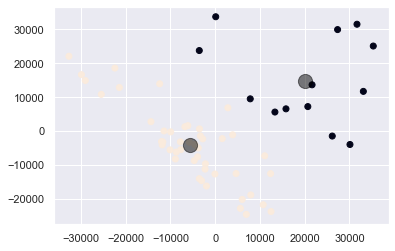

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data2d)
y_kmeans = kmeans.predict(data2d)
plt.scatter(data2d[:, 0], data2d[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

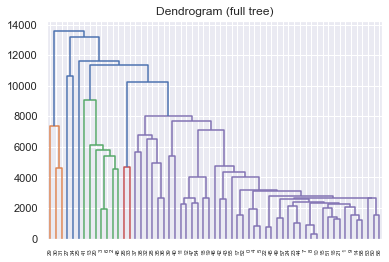

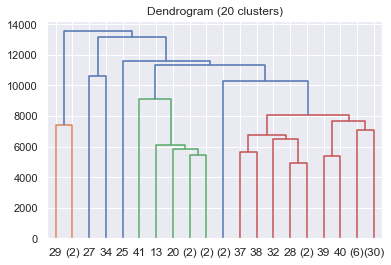

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure()
plt.title("Dendrogram (full tree)")  
dend = shc.dendrogram(shc.linkage(data2d, method='single'))
plt.figure()
plt.title("Dendrogram (20 clusters)") 
dend1 = shc.dendrogram(shc.linkage(data2d, method='single'), p=20, truncate_mode='lastp')

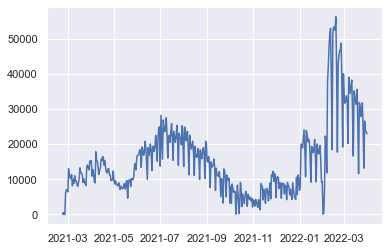

In [ ]:
plt.plot(df['totalDose.daily.sinovac'])

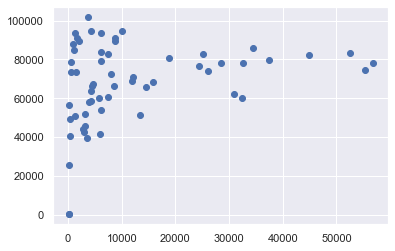

In [ ]:
plt.scatter(df.loc['2022-02-01':'2022-03-31','Number of confirmed cases'],df.loc['2022-02-01':'2022-03-31','totalDose.daily.total'])

In [ ]:
### GLM and poisson regression

In [ ]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(diffdf, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 322
No. of testing examples: 81


In [ ]:
diffdf.loc['2022-02-14':'2022-03-31',["Number of confirmed cases","Number of death cases"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-02-14 to 2022-03-31
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number of confirmed cases  46 non-null     float64
 1   Number of death cases      46 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df["Number of confirmed cases"] = df["Number of confirmed cases"].astype(int)
df["Number of death cases"] = df["Number of death cases"].astype(int)
df.loc['2022-02-14':'2022-03-31',["Number of confirmed cases","Number of death cases"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-02-14 to 2022-03-31
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Number of confirmed cases  46 non-null     int64
 1   Number of death cases      46 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [ ]:
df["totalDose.daily.sinovac"] = df["totalDose.daily.sinovac"].astype(int)
df["totalDose.daily.biontech"] = df["totalDose.daily.biontech"].astype(int)
df["totalDose.daily.total"] = df["totalDose.daily.total"].astype(int)
df.loc['2022-02-14':'2022-03-31',["totalDose.daily.biontech","totalDose.daily.sinovac","totalDose.daily.total"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46 entries, 2022-02-14 to 2022-03-31
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   totalDose.daily.biontech  46 non-null     int64
 1   totalDose.daily.sinovac   46 non-null     int64
 2   totalDose.daily.total     46 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


In [ ]:
X = np.array(df.loc['2022-02-01':'2022-03-31',["Number of confirmed cases","Number of death cases"]])
X
y = np.array(df.loc['2022-02-01':'2022-03-31',"totalDose.daily.total"])
y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
y_train

array([ 73437,  91257,  76808,  59946,  93889, 102016,  89411,  62194,
        94562,  74574,  79187,  70774,  85869,  83257,  39695,  89629,
        93723,  53686,  83018,  41776,  67182,  66528,  60237,  42538,
        25790,  63583,  66129,  83605,     85,  56695,  68649,  80708,
        74202,  58266,  78085,  72528,  68527,  87852,  58329,  84812,
        91087,  51522,    317,  40596,  51800,  60608,  44049])

In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
clf = linear_model.PoissonRegressor()
X_normalized = preprocessing.normalize(X_train, norm='l2')
clf.fit(X_normalized, y_train)

PoissonRegressor()

In [ ]:
clf.score(X_normalized, y_train, sample_weight=None)

0.05045148789948639

In [ ]:
clf.coef_

array([ 0.48609221, -4.75022961])

In [ ]:
clf.intercept_

10.700276419984572

In [ ]:
X_test_norm = preprocessing.normalize(X_test, norm='l2')
y_pred = clf.predict(X_test_norm)

In [ ]:
y_pred

array([72140.33749089, 71596.46307315, 57490.32114187, 69716.30196378,
       72140.33749089, 69599.12135856, 68720.36434509, 70158.64263187,
       72140.33749089, 65815.01771367, 72140.33749089, 71532.27498866])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R2 Score: ", r2)

MAE:  11570.094588924549
MSE:  190758195.65354052
RMSE: 13811.52401632566
R2 Score:  0.12943409197670308


## Task 3: Number of confirmed cases for a period of time
21205566 Law Ka Leong

In [ ]:
def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

In [ ]:
urls = generateAPILinks()
len(urls)

736

In [ ]:
urls[0]

'https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv&time=20200404-0917'

In [ ]:
latest_situation_of_reported_cases_covid_19_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv')
len(latest_situation_of_reported_cases_covid_19_urls)

736

In [ ]:
latest_situation_of_reported_cases_covid_19_urls[0]

'https://api.data.gov.hk/v1/historical-archive/get-file?url=http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Flatest_situation_of_reported_cases_covid_19_eng.csv&time=20200404-0917'

In [ ]:
pd.read_csv(latest_situation_of_reported_cases_covid_19_urls[0]).head(5)

As of date As of time  Number of confirmed cases  \
0  08/01/2020      12:00                          0   
1  09/01/2020      12:00                          0   
2  10/01/2020      12:00                          0   
3  11/01/2020      12:00                          0   
4  12/01/2020      12:00                          0   

   Number of ruled out cases  \
0                         21   
1                         25   
2                         31   
3                         46   
4                         51   

   Number of cases still hospitalised for investigation  \
0                                                 17      
1                                                 23      
2                                                 23      
3                                                 15      
4                                                 16      

   Number of cases fulfilling the reporting criteria  Number of death cases  \
0                                                 38                      0   
1                                                 48                      0   
2                                                 54                      0   
3                                                 61                      0   
4                                                 67                      0   

   Number of discharge cases  Number of probable cases  
0                          0                         0  
1                          0                         0  
2                          0                         0  
3                          0                         0  
4                          0                         0

In [ ]:
pd.read_csv(latest_situation_of_reported_cases_covid_19_urls[-1]).tail(5)

As of date As of time  Number of confirmed cases  \
824  11/04/2022        NaN                        NaN   
825  12/04/2022        NaN                        NaN   
826  13/04/2022        NaN                        NaN   
827  14/04/2022        NaN                        NaN   
828  15/04/2022        NaN                        NaN   

     Number of ruled out cases  \
824                        NaN   
825                        NaN   
826                        NaN   
827                        NaN   
828                        NaN   

     Number of cases still hospitalised for investigation  \
824                                                NaN      
825                                                NaN      
826                                                NaN      
827                                                NaN      
828                                                NaN      

     Number of cases fulfilling the reporting criteria  Number of death cases  \
824                                                NaN                   8827   
825                                                NaN                   8886   
826                                                NaN                   8948   
827                                                NaN                   9002   
828                                                NaN                   9069   

     Number of discharge cases  Number of probable cases  \
824                      60605                       NaN   
825                      62035                       NaN   
826                      63579                       NaN   
827                      65086                       NaN   
828                      66797                       NaN   

     Number of hospitalised cases in critical condition  \
824                                               60.0    
825                                               58.0    
826                                               54.0    
827                                               58.0    
828                                               56.0    

     Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests  \
824                                           751820.0                            
825                                           752555.0                            
826                                           753289.0                            
827                                           753868.0                            
828                                           754339.0                            

     Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests  
824                                           439770.0                            
825                                           440468.0                            
826                                           441006.0                            
827                                           441470.0                            
828                                           441945.0

### Fetching Data

In [ ]:
latest_situation_of_reported_cases_covid_19_df = pd.DataFrame()
for u in tqdm(latest_situation_of_reported_cases_covid_19_urls):
  latest_situation_of_reported_cases_covid_19_df = pd.concat([latest_situation_of_reported_cases_covid_19_df, pd.read_csv(u)], ignore_index=True)

100%|█████████████████████████████████████████| 736/736 [06:03<00:00,  2.03it/s]


In [ ]:
latest_situation_of_reported_cases_covid_19_df.to_csv('latest_situation_of_reported_cases_covid_19.csv')

In [ ]:
latest_situation_of_reported_cases_covid_19_df = pd.read_csv('latest_situation_of_reported_cases_covid_19.csv', index_col=0)

### Data Processing

In [ ]:
latest_situation_of_reported_cases_covid_19_df.index = latest_situation_of_reported_cases_covid_19_df['As of date']

In [ ]:
type(latest_situation_of_reported_cases_covid_19_df.index)

pandas.core.indexes.base.Index

In [ ]:
latest_situation_of_reported_cases_covid_19_df.index = pd.to_datetime(latest_situation_of_reported_cases_covid_19_df.index)

In [ ]:
latest_situation_of_reported_cases_covid_19_df.index

DatetimeIndex(['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2022-06-04', '2022-07-04', '2022-08-04', '2022-09-04',
               '2022-10-04', '2022-11-04', '2022-12-04', '2022-04-13',
               '2022-04-14', '2022-04-15'],
              dtype='datetime64[ns]', name='As of date', length=336185, freq=None)

In [ ]:
latest_situation_of_reported_cases_covid_19_df = latest_situation_of_reported_cases_covid_19_df[~latest_situation_of_reported_cases_covid_19_df.index.duplicated(keep='first')].to_csv('clean.csv')

In [ ]:
df = pd.read_csv('clean.csv', index_col=0)

In [ ]:
df = df[df.index.notnull()]

In [ ]:
df.index

Index(['2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
       ...
       '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-01-04',
       '2022-02-04', '2022-03-04', '2022-04-04', '2022-05-04', '2022-06-04'],
      dtype='object', name='As of date', length=820)

### Exploring Data

In [ ]:
df.head(5)

As of date.1 As of time  Number of confirmed cases  \
As of date                                                      
2020-08-01   08/01/2020      12:00                        0.0   
2020-09-01   09/01/2020      12:00                        0.0   
2020-10-01   10/01/2020      12:00                        0.0   
2020-11-01   11/01/2020      12:00                        0.0   
2020-12-01   12/01/2020      12:00                        0.0   

            Number of ruled out cases  \
As of date                              
2020-08-01                       21.0   
2020-09-01                       25.0   
2020-10-01                       31.0   
2020-11-01                       46.0   
2020-12-01                       51.0   

            Number of cases still hospitalised for investigation  \
As of date                                                         
2020-08-01                                               17.0      
2020-09-01                                               23.0      
2020-10-01                                               23.0      
2020-11-01                                               15.0      
2020-12-01                                               16.0      

            Number of cases fulfilling the reporting criteria  \
As of date                                                      
2020-08-01                                               38.0   
2020-09-01                                               48.0   
2020-10-01                                               54.0   
2020-11-01                                               61.0   
2020-12-01                                               67.0   

            Number of death cases  Number of discharge cases  \
As of date                                                     
2020-08-01                      0                          0   
2020-09-01                      0                          0   
2020-10-01                      0                          0   
2020-11-01                      0                          0   
2020-12-01                      0                          0   

            Number of probable cases  \
As of date                             
2020-08-01                       0.0   
2020-09-01                       0.0   
2020-10-01                       0.0   
2020-11-01                       0.0   
2020-12-01                       0.0   

            Number of hospitalised cases in critical condition  \
As of date                                                       
2020-08-01                                                NaN    
2020-09-01                                                NaN    
2020-10-01                                                NaN    
2020-11-01                                                NaN    
2020-12-01                                                NaN    

            Number of cases tested positive for SARS-CoV-2 virus  \
As of date                                                         
2020-08-01                                                NaN      
2020-09-01                                                NaN      
2020-10-01                                                NaN      
2020-11-01                                                NaN      
2020-12-01                                                NaN      

            Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests  \
As of date                                                                               
2020-08-01                                                NaN                            
2020-09-01                                                NaN                            
2020-10-01                                                NaN                            
2020-11-01                                                NaN                            
2020-12-01                                                NaN                            

            Number of cases teste

In [ ]:
df.tail(5)

As of date.1 As of time  Number of confirmed cases  \
As of date                                                      
2022-02-04   02/04/2022        NaN                        NaN   
2022-03-04   03/04/2022        NaN                        NaN   
2022-04-04   04/04/2022        NaN                        NaN   
2022-05-04   05/04/2022        NaN                        NaN   
2022-06-04   06/04/2022        NaN                        NaN   

            Number of ruled out cases  \
As of date                              
2022-02-04                        NaN   
2022-03-04                        NaN   
2022-04-04                        NaN   
2022-05-04                        NaN   
2022-06-04                        NaN   

            Number of cases still hospitalised for investigation  \
As of date                                                         
2022-02-04                                                NaN      
2022-03-04                                                NaN      
2022-04-04                                                NaN      
2022-05-04                                                NaN      
2022-06-04                                                NaN      

            Number of cases fulfilling the reporting criteria  \
As of date                                                      
2022-02-04                                                NaN   
2022-03-04                                                NaN   
2022-04-04                                                NaN   
2022-05-04                                                NaN   
2022-06-04                                                NaN   

            Number of death cases  Number of discharge cases  \
As of date                                                     
2022-02-04                   8061                      51468   
2022-03-04                   8172                      52339   
2022-04-04                   8262                      52721   
2022-05-04                   8349                      54168   
2022-06-04                   8460                      54823   

            Number of probable cases  \
As of date                             
2022-02-04                       NaN   
2022-03-04                       NaN   
2022-04-04                       NaN   
2022-05-04                       NaN   
2022-06-04                       NaN   

            Number of hospitalised cases in critical condition  \
As of date                                                       
2022-02-04                                               79.0    
2022-03-04                                               78.0    
2022-04-04                                               75.0    
2022-05-04                                               71.0    
2022-06-04                                               74.0    

            Number of cases tested positive for SARS-CoV-2 virus  \
As of date                                                         
2022-02-04                                                NaN      
2022-03-04                                                NaN      
2022-04-04                                                NaN      
2022-05-04                                                NaN      
2022-06-04                                                NaN      

            Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests  \
As of date                                                                               
2022-02-04                                           740174.0                            
2022-03-04                                           742006.0                            
2022-04-04                                           743595.0                            
2022-05-04                                           745253.0                            
2022-06-04                                           746742.0                            

            Number of cases teste

### Feature engineering

In [ ]:
df['Number of confirmed cases'].fillna(df['Number of cases tested positive for SARS-CoV-2 virus'], inplace=True)
df['Number of confirmed cases'].fillna(df['Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests'], inplace=True)

In [ ]:
df['Number of confirmed cases per day']= df['Number of confirmed cases'].diff()
df['Number of death cases per day']= df['Number of death cases'].diff()
df

As of date.1 As of time  Number of confirmed cases  \
As of date                                                      
2020-08-01   08/01/2020      12:00                        0.0   
2020-09-01   09/01/2020      12:00                        0.0   
2020-10-01   10/01/2020      12:00                        0.0   
2020-11-01   11/01/2020      12:00                        0.0   
2020-12-01   12/01/2020      12:00                        0.0   
...                 ...        ...                        ...   
2022-02-04   02/04/2022        NaN                        NaN   
2022-03-04   03/04/2022        NaN                        NaN   
2022-04-04   04/04/2022        NaN                        NaN   
2022-05-04   05/04/2022        NaN                        NaN   
2022-06-04   06/04/2022        NaN                        NaN   

            Number of ruled out cases  \
As of date                              
2020-08-01                       21.0   
2020-09-01                       25.0   
2020-10-01                       31.0   
2020-11-01                       46.0   
2020-12-01                       51.0   
...                               ...   
2022-02-04                        NaN   
2022-03-04                        NaN   
2022-04-04                        NaN   
2022-05-04                        NaN   
2022-06-04                        NaN   

            Number of cases still hospitalised for investigation  \
As of date                                                         
2020-08-01                                               17.0      
2020-09-01                                               23.0      
2020-10-01                                               23.0      
2020-11-01                                               15.0      
2020-12-01                                               16.0      
...                                                       ...      
2022-02-04                                                NaN      
2022-03-04                                                NaN      
2022-04-04                                                NaN      
2022-05-04                                                NaN      
2022-06-04                                                NaN      

            Number of cases fulfilling the reporting criteria  \
As of date                                                      
2020-08-01                                               38.0   
2020-09-01                                               48.0   
2020-10-01                                               54.0   
2020-11-01                                               61.0   
2020-12-01                                               67.0   
...                                                       ...   
2022-02-04                                                NaN   
2022-03-04                                                NaN   
2022-04-04                                                NaN   
2022-05-04                                                NaN   
2022-06-04                                                NaN   

            Number of death cases  Number of discharge cases  \
As of date                                                     
2020-08-01                      0                          0   
2020-09-01                      0                          0   
2020-10-01                      0                          0   
2020-11-01                      0                          0   
2020-12-01                      0                          0   
...                           ...                        ...   
2022-02-04                   8061                      51468   
2022-03-04                   8172                      52339   
2022-04-04                   8262                      52721   
2022-05-04                   8349                      54168   
2022-06-04                   8460                      54823   

            Number of probable cases  \
As of date                 

### Visualization

<AxesSubplot:xlabel='As of date', ylabel='Number of confirmed cases per day'>

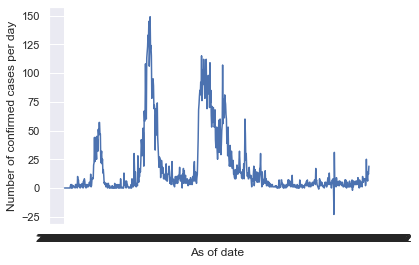

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x=df.index, y='Number of confirmed cases per day',
             data=df)

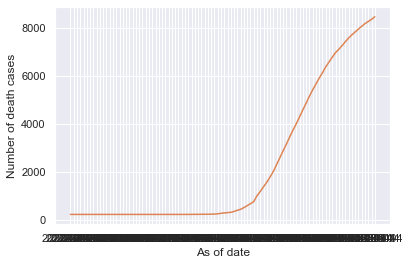

In [ ]:
sns.lineplot(x=df.loc['2022-03-01':'2022-06-04'].index, y='Number of confirmed cases per day',
             data=df.loc['2022-03-01':'2022-06-04']);
sns.lineplot(x=df.loc['2022-03-01':'2022-06-04'].index, y='Number of death cases',
             data=df.loc['2022-03-01':'2022-06-04']);

### Virus Predictor using Machine Learning

#### Prepare Data

In [ ]:
df.insert(0, 'id', range(1, 1 + len(df)))

In [ ]:
df

id As of date.1 As of time  Number of confirmed cases  \
As of date                                                           
2020-08-01    1   08/01/2020      12:00                        0.0   
2020-09-01    2   09/01/2020      12:00                        0.0   
2020-10-01    3   10/01/2020      12:00                        0.0   
2020-11-01    4   11/01/2020      12:00                        0.0   
2020-12-01    5   12/01/2020      12:00                        0.0   
...         ...          ...        ...                        ...   
2022-02-04  816   02/04/2022        NaN                   740174.0   
2022-03-04  817   03/04/2022        NaN                   742006.0   
2022-04-04  818   04/04/2022        NaN                   743595.0   
2022-05-04  819   05/04/2022        NaN                   745253.0   
2022-06-04  820   06/04/2022        NaN                   746742.0   

            Number of ruled out cases  \
As of date                              
2020-08-01                       21.0   
2020-09-01                       25.0   
2020-10-01                       31.0   
2020-11-01                       46.0   
2020-12-01                       51.0   
...                               ...   
2022-02-04                        NaN   
2022-03-04                        NaN   
2022-04-04                        NaN   
2022-05-04                        NaN   
2022-06-04                        NaN   

            Number of cases still hospitalised for investigation  \
As of date                                                         
2020-08-01                                               17.0      
2020-09-01                                               23.0      
2020-10-01                                               23.0      
2020-11-01                                               15.0      
2020-12-01                                               16.0      
...                                                       ...      
2022-02-04                                                NaN      
2022-03-04                                                NaN      
2022-04-04                                                NaN      
2022-05-04                                                NaN      
2022-06-04                                                NaN      

            Number of cases fulfilling the reporting criteria  \
As of date                                                      
2020-08-01                                               38.0   
2020-09-01                                               48.0   
2020-10-01                                               54.0   
2020-11-01                                               61.0   
2020-12-01                                               67.0   
...                                                       ...   
2022-02-04                                                NaN   
2022-03-04                                                NaN   
2022-04-04                                                NaN   
2022-05-04                                                NaN   
2022-06-04                                                NaN   

            Number of death cases  Number of discharge cases  \
As of date                                                     
2020-08-01                      0                          0   
2020-09-01                      0                          0   
2020-10-01                      0                          0   
2020-11-01                      0                          0   
2020-12-01                      0                          0   
...                           ...                        ...   
2022-02-04                   8061                      51468   
2022-03-04                   8172                      52339   
2022-04-04                   8262                      52721   
2022-05-04                   8349                      54168   
2022-06-04                   8460                      54823   

    

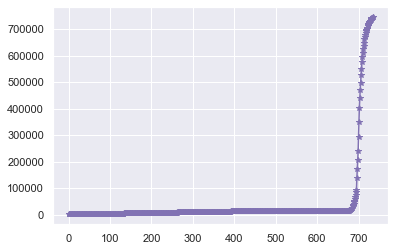

In [ ]:
x = np.array(df['id'].loc['2020-01-04':'2022-06-04']).reshape(-1, 1)
y = np.array(df['Number of confirmed cases'].loc['2020-01-04':'2022-06-04']).reshape(-1, 1)
plt.plot(y, '-m*')
plt.show()

In [ ]:
polyFeat = PolynomialFeatures(degree=4)
x = polyFeat.fit_transform(x)
print(x)

[[1.00000000e+00 8.50000000e+01 7.22500000e+03 6.14125000e+05
  5.22006250e+07]
 [1.00000000e+00 8.60000000e+01 7.39600000e+03 6.36056000e+05
  5.47008160e+07]
 [1.00000000e+00 8.70000000e+01 7.56900000e+03 6.58503000e+05
  5.72897610e+07]
 ...
 [1.00000000e+00 8.18000000e+02 6.69124000e+05 5.47343432e+08
  4.47726927e+11]
 [1.00000000e+00 8.19000000e+02 6.70761000e+05 5.49353259e+08
  4.49920319e+11]
 [1.00000000e+00 8.20000000e+02 6.72400000e+05 5.51368000e+08
  4.52121760e+11]]


### Training Data

------------------------------
TRAINING DATA
------------------------------
Accuracy:73.969 %


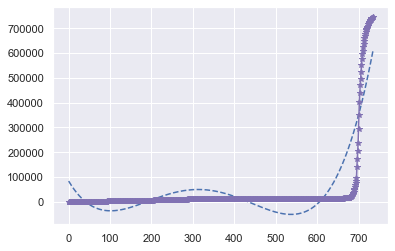

In [ ]:
print('-'*30);print('TRAINING DATA');print('-'*30)
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')
y0 = model.predict(x)
plt.plot(y0, '--b')
plt.plot(y, '-m*')
plt.show()

#### Prediction

------------------------------
PREDICTION
------------------------------
Prediction - Cases after 700 days:2.23 Million


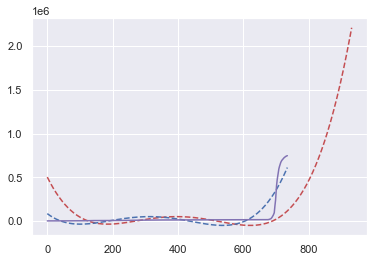

In [ ]:
days = 700
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction - Cases after {days} days:', end='')
print(round(int(model.predict(polyFeat.fit_transform([[234+days]])))/1000000,2), 'Million')

x1 = np.array(list(range(1,234+days))).reshape(-1,1)
y1 = model.predict(polyFeat.fit_transform(x1))
plt.plot(y1, '--r')
plt.plot(y0, '--b')
plt.plot(y, '-m')

plt.show()

## Task 4: Possible factors that affect death rate
20234198 YIP Cham Sum

### Data fetching

In [ ]:
def generateAPILinks(file_url = 'http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv', start = '20200101', end = strftime('%Y%m%d', gmtime(time() - 3600 * 24))):
  response = requests.get(f'https://api.data.gov.hk/v1/historical-archive/list-file-versions?url={urllib.parse.quote_plus(file_url)}&start={start}&end={end}')
  json = response.json()
  return [f'https://api.data.gov.hk/v1/historical-archive/get-file?url={urllib.parse.quote_plus(file_url)}&time=' + t for t in json['timestamps']]

enhanced_sur_covid_19_urls = generateAPILinks('http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv')

enhanced_sur_covid_19_df = pd.DataFrame()
for u in tqdm(enhanced_sur_covid_19_urls):
  enhanced_sur_covid_19_df = pd.concat([enhanced_sur_covid_19_df, pd.read_csv(u, index_col=0)])
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng.csv')

100%|█████████████████████████████████████████| 698/698 [11:22<00:00,  1.02it/s]


### Data cleaning

In [ ]:
# Import dataframe
enhanced_sur_covid_19_df = pd.read_csv('enhanced_sur_covid_19_eng.csv',index_col=0)

# Data Cleaning
enhanced_sur_covid_19_df.drop(enhanced_sur_covid_19_df.iloc[:, [
                              1, 10, 11, 12]], axis=1, inplace=True)
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Hospitalised/Discharged/Deceased'].isin(['Discharged', 'Deceased'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['HK/Non-HK resident'].isin(['HK resident', 'Non-HK resident'])]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Report date'] != '16/0了7/2020']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Date of onset'].str.contains('/') == True]
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '1 month']
enhanced_sur_covid_19_df = enhanced_sur_covid_19_df[
    enhanced_sur_covid_19_df['Age'] != '<1']

# Export
enhanced_sur_covid_19_df.to_csv('enhanced_sur_covid_19_eng_clean.csv')

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,8,9,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Simple Visual

/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/adonis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<Figure size 432x288 with 0 Axes>

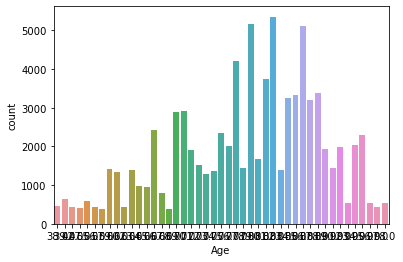

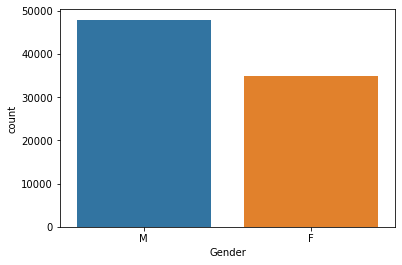

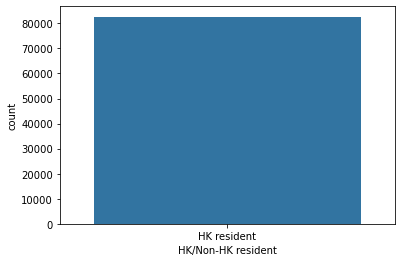

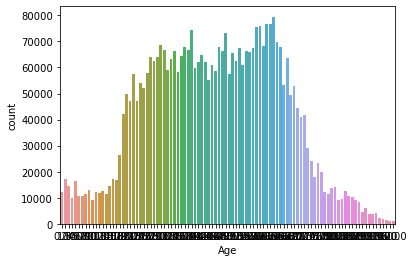

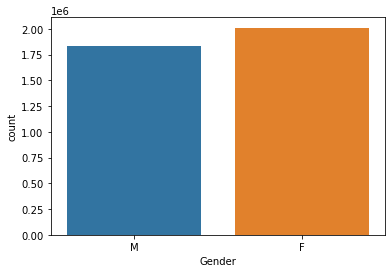

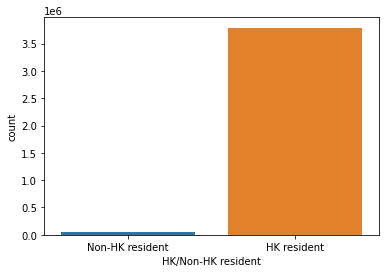

<Figure size 432x288 with 0 Axes>

In [ ]:
# Import dataframe
df = pd.read_csv('enhanced_sur_covid_19_eng_clean.csv', index_col=0)

# Filtering
death = df[df['Hospitalised/Discharged/Deceased'] == 'Deceased']
discharge = df[df['Hospitalised/Discharged/Deceased'] == 'Discharged']

# Simple Visual
sns.countplot(data=death,x='Age')
plt.figure()
sns.countplot(data=death,x='Gender')
plt.figure()
sns.countplot(data=death,x='HK/Non-HK resident')
plt.figure()
sns.countplot(data=discharge,x='Age')
plt.figure()
sns.countplot(data=discharge,x='Gender')
plt.figure()
sns.countplot(data=discharge,x='HK/Non-HK resident')
plt.figure()

### Data processing

In [ ]:
df['Gender'] = df['Gender'].replace(['M', 'F'], [0, 1])
df['Gender'] = df['Gender'].astype(int)
df['Name of hospital admitted'] = df['Name of hospital admitted'].astype(
    'category')
df['Hospitalised/Discharged/Deceased'] = df['Hospitalised/Discharged/Deceased'].replace(
    ['Discharged', 'Deceased'], [0, 1])
df['Hospitalised/Discharged/Deceased'] = df['Hospitalised/Discharged/Deceased'].astype(
    int)
df['HK/Non-HK resident'] = df['HK/Non-HK resident'].replace(
    ['HK resident', 'Non-HK resident'], [0, 1])
df['HK/Non-HK resident'] = df['HK/Non-HK resident'].astype(
    int)
df['Case classification*'] = df['Case classification*'].astype(
    'category')
df['Age'] = df['Age'].astype(float)
df['Age'] = df['Age'].astype(int)
df['Confirmed/probable'] = df['Confirmed/probable'].astype(
    'category')
df['Report date'] = pd.to_datetime(
    df['Report date'].astype(str), format="%d/%m/%Y")
df['Date of onset'] = pd.to_datetime(
    df['Date of onset'].astype(str), format="%d/%m/%Y")
df.index = df['Date of onset']